# Sustainability Project

In [71]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization setup
sns.set(style='whitegrid')
palette = {
    'green_dark': '#2E7D32',
    'green_medium': '#66BB6A',
    'green_light': '#A5D6A7',
    'brown': '#8D6E63',
    'amber': '#FFB74D'
}
plt.rcParams['figure.figsize'] = (10, 6)

# Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)


# Ignoring warning messages
import warnings
warnings.filterwarnings("ignore")



In [72]:
# Reading the File
df=pd.read_csv(r'D:\Dina Projects\Data Analysis Projects\Data sets\Sustainability_Raw_Data.csv')

In [73]:
# Exploring Data
print("Data loaded successfully.")
print("Shape:", df.shape)
df.head()


Data loaded successfully.
Shape: (5000, 24)


,sustainability_rating,eco_friendly_manufacturing,carbon_footprint,water_usage,waste_production,recycling_programs,average_price,product_nameproduct_category,sustainability_status,eco_index,sustainability_level,brand_name,brand_category,country_name,region,year,material_type,renewable,product_line,target_audience,market_trend,trend_score,certification,cert_type
0,3.95,1,15.28,766,16.13,0,30.99,EcoBottle - Office Supplies,Partially Sustainable,3.426,Medium,BioBloom,Local,Egypt,Africa,2019,Glass,Partial,Office Supplies,Business,Rising,3,EU Ecolabel,Environmental
1,3.29,0,103.77,1079,3.06,0,36.04,GreenCup - Office Supplies,Not Sustainable,1.615,Low,TerraLeaf,Local,Germany,Europe,2018,Stainless Steel,No,Office Supplies,Business,Stable,2,ISO14001,Environmental
2,3.08,0,14.30,611,0.87,1,0.07,GreenShirt - Toys,Partially Sustainable,5.389,Medium,GreenWorks,Startup,USA,Americas,2021,Bioplastic,Yes,Toys,Kids,Rising,3,GOTS,Environmental
3,2.99,0,8.50,685,2.19,0,3.72,EcoBrush - Office Supplies,Not Sustainable,2.756,Low,NatureNest,Local,Turkey,Asia,2024,Aluminum,Partial,Office Supplies,Business,Rising,3,NaN,NaN
4,4.82,1,10.79,294,0.95,0,35.03,BioShirt - Clothing,Partially Sustainable,4.351,Medium,PlanetWell,Local,Spain,Europe,2024,Bioplastic,Yes,Clothing,Adults,Declining,1,ISO14001,Environmental


In [74]:
# Statistical summary for numeric columns
df.describe()

,sustainability_rating,eco_friendly_manufacturing,carbon_footprint,water_usage,waste_production,recycling_programs,average_price,eco_index,year,trend_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.490886,0.525800,34.947142,833.927800,6.707758,0.426800,30.564086,4.085252,2020.002600,2.006200
std,0.873516,0.499384,48.307911,1374.166162,8.209816,0.494662,16.075457,2.232166,3.175439,0.819937
min,1.000000,0.000000,0.470000,6.000000,0.240000,0.000000,0.010000,0.136000,2015.000000,1.000000
25%,2.890000,0.000000,10.402500,171.000000,2.390000,0.000000,18.635000,2.362750,2017.000000,1.000000
50%,3.510000,1.000000,20.340000,398.000000,4.480000,0.000000,30.390000,3.391000,2020.000000,2.000000
75%,4.140000,1.000000,40.567500,908.000000,8.175000,1.000000,41.860000,5.822750,2023.000000,3.000000
max,5.000000,1.000000,755.460000,19235.000000,249.930000,1.000000,89.400000,9.866000,2025.000000,3.000000


In [75]:
# Checking Data types and missing data >> # Basic info

df.info()

# Another method for checking data types
# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sustainability_rating         5000 non-null   float64
 1   eco_friendly_manufacturing    5000 non-null   int64  
 2   carbon_footprint              5000 non-null   float64
 3   water_usage                   5000 non-null   int64  
 4   waste_production              5000 non-null   float64
 5   recycling_programs            5000 non-null   int64  
 6   average_price                 5000 non-null   float64
 7   product_nameproduct_category  5000 non-null   object 
 8   sustainability_status         5000 non-null   object 
 9   eco_index                     5000 non-null   float64
 10  sustainability_level          5000 non-null   object 
 11  brand_name                    5000 non-null   object 
 12  brand_category                5000 non-null   object 
 13  cou

Pearson Correlation Matrix:
                        sustainability_rating  carbon_footprint  \
sustainability_rating               1.000000         -0.178804   
carbon_footprint                   -0.178804          1.000000   
waste_production                   -0.140227          0.006362   
water_usage                        -0.153972          0.024626   
average_price                       0.482740         -0.097766   

                       waste_production  water_usage  average_price  
sustainability_rating         -0.140227    -0.153972       0.482740  
carbon_footprint               0.006362     0.024626      -0.097766  
waste_production               1.000000     0.018747      -0.066637  
water_usage                    0.018747     1.000000      -0.065340  
average_price                 -0.066637    -0.065340       1.000000  


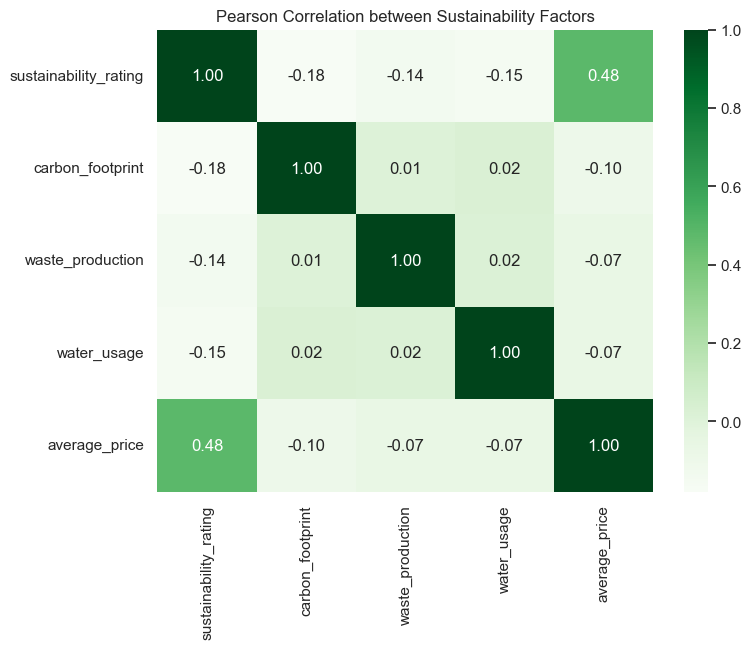

In [76]:
# Statistics
#(Finding Correlation between Sustainability_rating ,carbon_footprint, waste_production, water_usge,average_price ) using (Pearson rule)

# Select relevant columns
cols = ['sustainability_rating', 'carbon_footprint', 'waste_production', 'water_usage', 'average_price']
data = df[cols]

# Calculate Pearson correlation
correlation_matrix = data.corr(method='pearson')

# Display correlation matrix
print("Pearson Correlation Matrix:\n", correlation_matrix)

# Visualize as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True,  cmap='Greens', fmt=".2f")
plt.title('Pearson Correlation between Sustainability Factors')
plt.show()


## Step 1: Cleaning & Preprocessing 

In [77]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("Column names standardized.")
df.columns

Column names standardized.


Index(['sustainability_rating', 'eco_friendly_manufacturing',
       'carbon_footprint', 'water_usage', 'waste_production',
       'recycling_programs', 'average_price', 'product_nameproduct_category',
       'sustainability_status', 'eco_index', 'sustainability_level',
       'brand_name', 'brand_category', 'country_name', 'region', 'year',
       'material_type', 'renewable', 'product_line', 'target_audience',
       'market_trend', 'trend_score', 'certification', 'cert_type'],
      dtype='object')

In [78]:
# Drop duplicate rows >> Detecting and removing dublicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Dropped {duplicates} duplicate rows.")    

# we have NO duplicates in our data


Dropped 0 duplicate rows.


In [79]:
# Trim whitespace and replace empty strings with NaN
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col] = df[col].astype(str).str.strip().replace(['', 'nan', 'None'], np.nan)
print("Whitespace trimmed and empty strings replaced with NaN.")

Whitespace trimmed and empty strings replaced with NaN.


In [80]:
# Modifying "Americas" to "America"
df['region'] = df['region'].replace('Americas', 'America')

In [81]:
# Check for missing values in all columns
missing_values = df.isna().sum()

# Display columns that have missing values only
print("Missing Values Summary:\n")
print(missing_values[missing_values > 0])


#  if you want to see all columns (including those with 0 missing):
print("\n Missing values in all columns:\n")
print(missing_values)

# We have No missing values in our data

Missing Values Summary:

certification    1125
cert_type        1125
dtype: int64

 Missing values in all columns:

sustainability_rating              0
eco_friendly_manufacturing         0
carbon_footprint                   0
water_usage                        0
waste_production                   0
recycling_programs                 0
average_price                      0
product_nameproduct_category       0
sustainability_status              0
eco_index                          0
sustainability_level               0
brand_name                         0
brand_category                     0
country_name                       0
region                             0
year                               0
material_type                      0
renewable                          0
product_line                       0
target_audience                    0
market_trend                       0
trend_score                        0
certification                   1125
cert_type                       1

In [82]:
# Drop unwanted columns
df.drop(['eco_index','product_nameproduct_category'], axis=1, inplace=True)

# Checking after removing them
df.head()


,sustainability_rating,eco_friendly_manufacturing,carbon_footprint,water_usage,waste_production,recycling_programs,average_price,sustainability_status,sustainability_level,brand_name,brand_category,country_name,region,year,material_type,renewable,product_line,target_audience,market_trend,trend_score,certification,cert_type
0,3.95,1,15.28,766,16.13,0,30.99,Partially Sustainable,Medium,BioBloom,Local,Egypt,Africa,2019,Glass,Partial,Office Supplies,Business,Rising,3,EU Ecolabel,Environmental
1,3.29,0,103.77,1079,3.06,0,36.04,Not Sustainable,Low,TerraLeaf,Local,Germany,Europe,2018,Stainless Steel,No,Office Supplies,Business,Stable,2,ISO14001,Environmental
2,3.08,0,14.30,611,0.87,1,0.07,Partially Sustainable,Medium,GreenWorks,Startup,USA,America,2021,Bioplastic,Yes,Toys,Kids,Rising,3,GOTS,Environmental
3,2.99,0,8.50,685,2.19,0,3.72,Not Sustainable,Low,NatureNest,Local,Turkey,Asia,2024,Aluminum,Partial,Office Supplies,Business,Rising,3,NaN,NaN
4,4.82,1,10.79,294,0.95,0,35.03,Partially Sustainable,Medium,PlanetWell,Local,Spain,Europe,2024,Bioplastic,Yes,Clothing,Adults,Declining,1,ISO14001,Environmental


In [83]:
 # Replace 0 and 1 with "Yes" and "No" in specific columns
df['recycling_programs'] = df['recycling_programs'].replace({1: 'Yes', 0: 'No'}).astype(str)
df['eco_friendly_manufacturing'] = df['eco_friendly_manufacturing'].replace({1: 'Yes', 0: 'No'}).astype(str)


# Check if the changes were applied correctly
df[['recycling_programs', 'eco_friendly_manufacturing']].head()

,recycling_programs,eco_friendly_manufacturing
0,No,Yes
1,No,No
2,Yes,No
3,No,No
4,No,Yes


In [84]:
# Replace values in the 'renewable' column
df['renewable'] = df['renewable'].replace({
    'Yes': 'Fully Renewable',
    'No': 'Not Renewable',
    'Partial': 'Partially Renewable'
})

# Rename the column from 'renewable' to 'material_status'
df.rename(columns={'renewable': 'material_status'}, inplace=True)

# Check the first few rows to confirm changes
df['material_status'].head()
df.head()

,sustainability_rating,eco_friendly_manufacturing,carbon_footprint,water_usage,waste_production,recycling_programs,average_price,sustainability_status,sustainability_level,brand_name,brand_category,country_name,region,year,material_type,material_status,product_line,target_audience,market_trend,trend_score,certification,cert_type
0,3.95,Yes,15.28,766,16.13,No,30.99,Partially Sustainable,Medium,BioBloom,Local,Egypt,Africa,2019,Glass,Partially Renewable,Office Supplies,Business,Rising,3,EU Ecolabel,Environmental
1,3.29,No,103.77,1079,3.06,No,36.04,Not Sustainable,Low,TerraLeaf,Local,Germany,Europe,2018,Stainless Steel,Not Renewable,Office Supplies,Business,Stable,2,ISO14001,Environmental
2,3.08,No,14.30,611,0.87,Yes,0.07,Partially Sustainable,Medium,GreenWorks,Startup,USA,America,2021,Bioplastic,Fully Renewable,Toys,Kids,Rising,3,GOTS,Environmental
3,2.99,No,8.50,685,2.19,No,3.72,Not Sustainable,Low,NatureNest,Local,Turkey,Asia,2024,Aluminum,Partially Renewable,Office Supplies,Business,Rising,3,NaN,NaN
4,4.82,Yes,10.79,294,0.95,No,35.03,Partially Sustainable,Medium,PlanetWell,Local,Spain,Europe,2024,Bioplastic,Fully Renewable,Clothing,Adults,Declining,1,ISO14001,Environmental


In [85]:
# Fill NaN values in both 'certification' and 'cert_type' columns
df[['certification', 'cert_type']] = df[['certification', 'cert_type']].fillna('Not Certified')

# Check if the changes were applied
print(df[['certification', 'cert_type']].isna().sum())  # should show 0 for both columns
df[['certification', 'cert_type']].head()

certification    0
cert_type        0
dtype: int64


,certification,cert_type
0,EU Ecolabel,Environmental
1,ISO14001,Environmental
2,GOTS,Environmental
3,Not Certified,Not Certified
4,ISO14001,Environmental


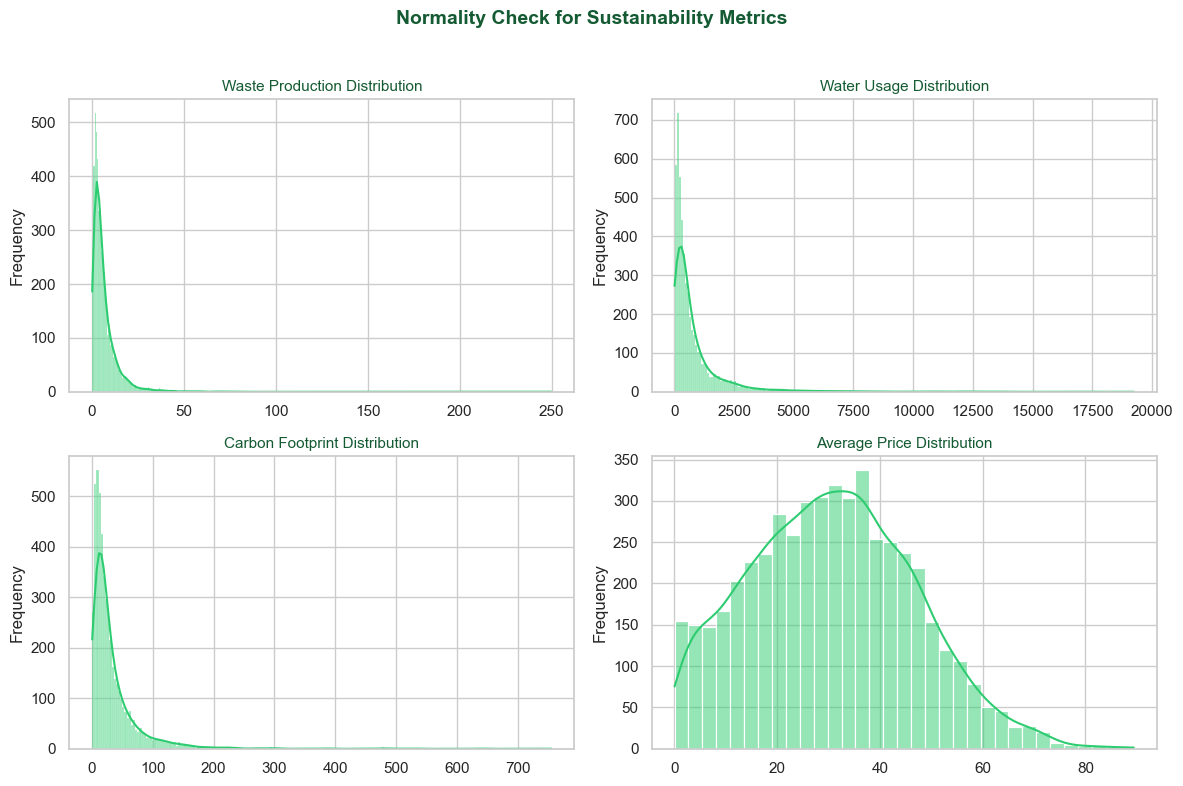

In [86]:
# Normality Check for Sustainability Metrics
main_green = '#27ae60'
light_green = '#2ecc71'
dark_green = '#145a32'

cols_to_check = ['waste_production', 'water_usage', 'carbon_footprint', 'average_price']
# Create 2x2 subplots for normality visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Normality Check for Sustainability Metrics", fontsize=14, color=dark_green, fontweight='bold')

for i, col in enumerate(cols_to_check):
    row, col_idx = divmod(i, 2)

    # Histogram with KDE (density curve)
    sns.histplot(df[col], kde=True, color=light_green, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"{col.replace('_', ' ').title()} Distribution", color=dark_green, fontsize=11)
    axes[row, col_idx].set_xlabel("")
    axes[row, col_idx].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

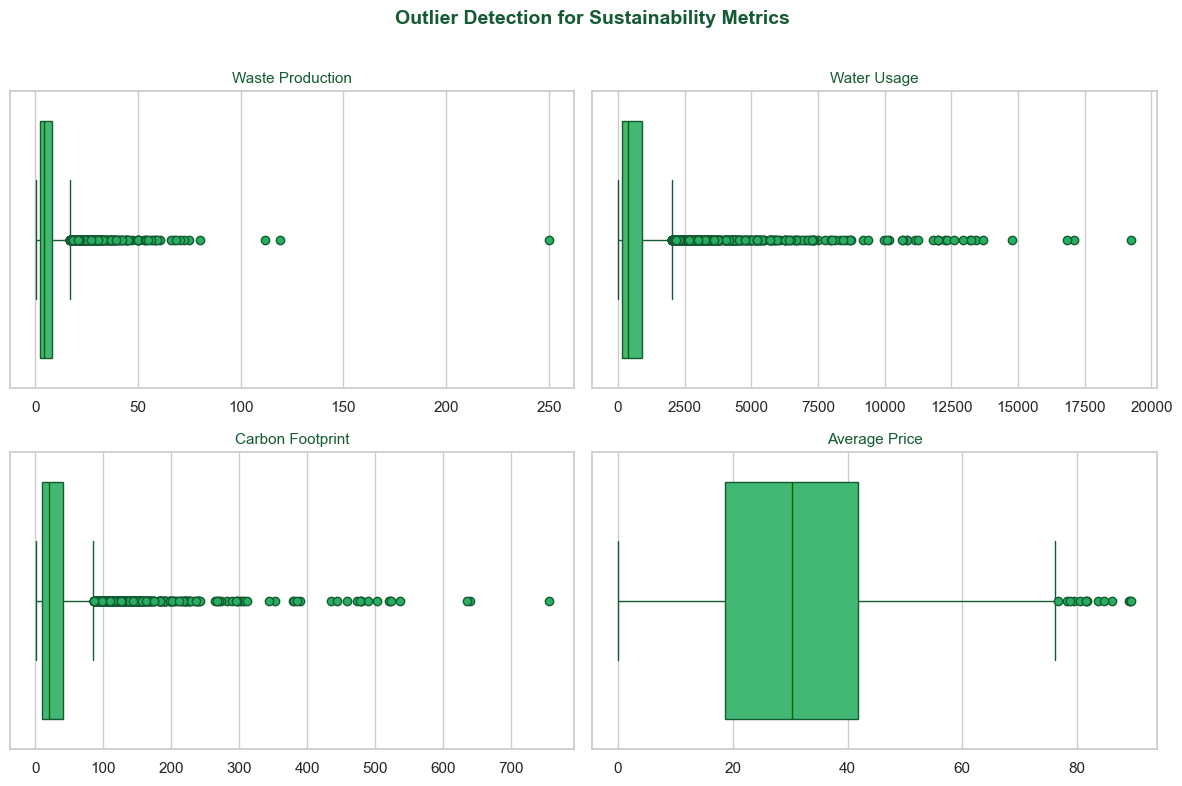


Summary of Outliers:
waste_production: 347
water_usage: 490
carbon_footprint: 421
average_price: 14


In [87]:
# Detecting Outliers

# Columns to check for outliers
cols_to_check = ['waste_production', 'water_usage', 'carbon_footprint', 'average_price']

# Define green color palette
main_green = '#27ae60'      
light_green = '#2ecc71'     
dark_green = '#145a32'     

# Detect outliers using the IQR method and store counts
outliers_summary = {}
for col in cols_to_check:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_summary[col] = len(outliers)
    else:
        print(f" Column '{col}' not found in dataset.")

#  Create subplots (2 rows × 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Outlier Detection for Sustainability Metrics", fontsize=14, color=dark_green, fontweight='bold')

# Set global Seaborn style
sns.set_style("whitegrid")

# Plot each variable in its own subplot
for i, col in enumerate(cols_to_check):
    if col in df.columns:
        row, col_idx = divmod(i, 2)
        sns.boxplot(ax=axes[row, col_idx],
                    x=df[col],
                    color=light_green,
                    boxprops=dict(edgecolor=dark_green),
                    medianprops=dict(color='darkgreen'),
                    whiskerprops=dict(color=dark_green),
                    capprops=dict(color=dark_green),
                    flierprops=dict(markerfacecolor=main_green, markeredgecolor=dark_green))
        axes[row, col_idx].set_title(col.replace('_', ' ').title(), color=dark_green, fontsize=11)
        axes[row, col_idx].set_xlabel('')
    else:
        axes[row, col_idx].set_visible(False)


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Print summary of detected outliers
print("\nSummary of Outliers:")
for col, count in outliers_summary.items():
    print(f"{col}: {count}")


In [88]:
# Handling outliers by capping
for col in cols_to_check:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

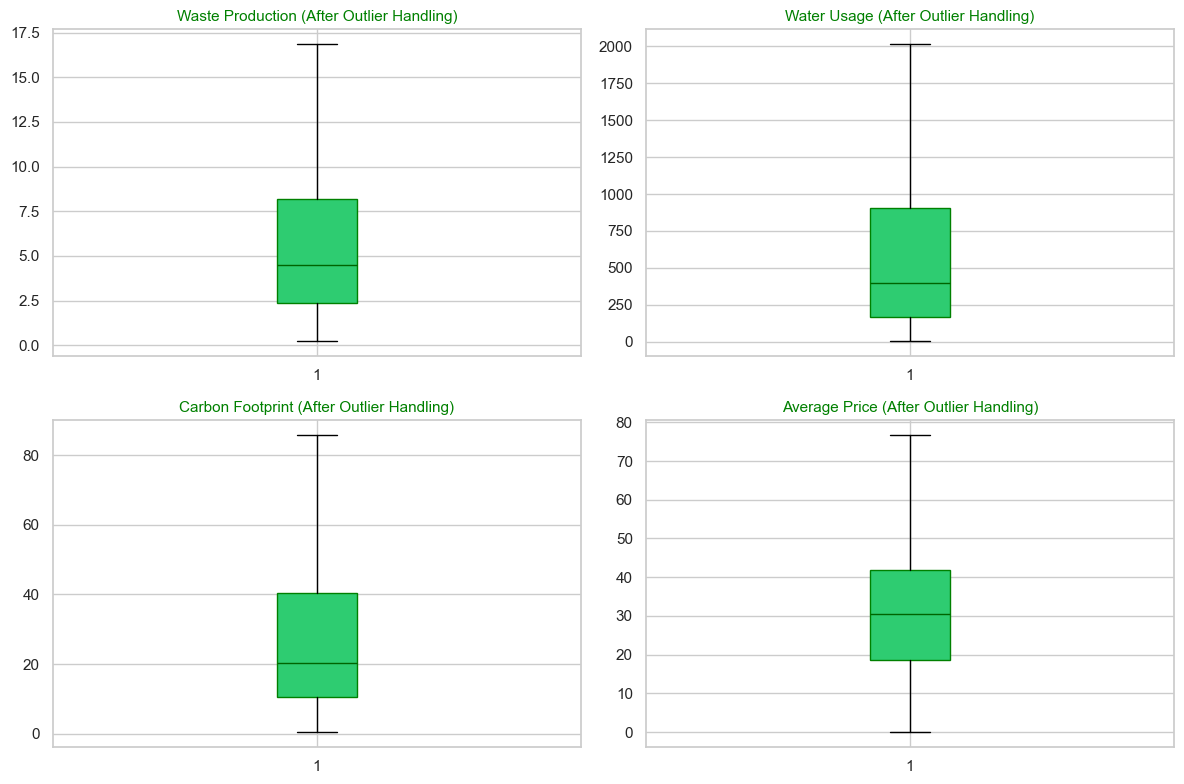

In [89]:
# Create a figure with 4 subplots (2 rows × 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Define a green color palette
box_color = '#2ecc71'  

# Plot each variable after handling outliers
axes[0, 0].boxplot(df['waste_production'], patch_artist=True,
                   boxprops=dict(facecolor=box_color, color='green'),
                   medianprops=dict(color='darkgreen'))
axes[0, 0].set_title('Waste Production (After Outlier Handling)', fontsize=11, color='green')

axes[0, 1].boxplot(df['water_usage'], patch_artist=True,
                   boxprops=dict(facecolor=box_color, color='green'),
                   medianprops=dict(color='darkgreen'))
axes[0, 1].set_title('Water Usage (After Outlier Handling)', fontsize=11, color='green')

axes[1, 0].boxplot(df['carbon_footprint'], patch_artist=True,
                   boxprops=dict(facecolor=box_color, color='green'),
                   medianprops=dict(color='darkgreen'))
axes[1, 0].set_title('Carbon Footprint (After Outlier Handling)', fontsize=11, color='green')

axes[1, 1].boxplot(df['average_price'], patch_artist=True,
                   boxprops=dict(facecolor=box_color, color='green'),
                   medianprops=dict(color='darkgreen'))
axes[1, 1].set_title('Average Price (After Outlier Handling)', fontsize=11, color='green')

plt.tight_layout()
plt.show()


In [90]:
# Save the updated dataset after cleaning
df.to_csv("Sustainability_Cleaned.csv", index=False)


## Step 2: Modeling

In [91]:

#  Create Dimension Tables

# Brand Dimension
brand_dim = df[['brand_name', 'brand_category']].drop_duplicates().reset_index(drop=True)
brand_dim['brand_id'] = brand_dim.index + 1

# Certification Dimension
certification_dim = df[['certification', 'cert_type']].drop_duplicates().reset_index(drop=True)
certification_dim['certification_id'] = certification_dim.index + 1

# Country Dimension
country_dim = df[['country_name', 'region']].drop_duplicates().reset_index(drop=True)
country_dim['country_id'] = country_dim.index + 1

# Material Dimension
material_dim = df[['material_type', 'material_status']].drop_duplicates().reset_index(drop=True)
material_dim['material_id'] = material_dim.index + 1

# Product Category Dimension
product_category_dim = df[['product_line', 'target_audience']].drop_duplicates().reset_index(drop=True)
product_category_dim['product_category_id'] = product_category_dim.index + 1

# Market Trend Dimension
market_trend_dim = df[['market_trend', 'trend_score']].drop_duplicates().reset_index(drop=True)
market_trend_dim['market_trend_id'] = market_trend_dim.index + 1

# Year Dimension
year_dim = df[['year']].drop_duplicates().reset_index(drop=True)
year_dim['year_id'] = year_dim.index + 1

#  Create Fact Table 
fact = df.merge(brand_dim, on=['brand_name', 'brand_category']) \
         .merge(certification_dim, on=['certification', 'cert_type']) \
         .merge(country_dim, on=['country_name', 'region']) \
         .merge(material_dim, on=['material_type', 'material_status']) \
         .merge(product_category_dim, on=['product_line', 'target_audience']) \
         .merge(market_trend_dim, on=['market_trend', 'trend_score']) \
         .merge(year_dim, on='year')

sustainability_fact = fact[[
    'sustainability_rating', 'eco_friendly_manufacturing', 'carbon_footprint',
    'water_usage', 'waste_production', 'recycling_programs', 'average_price',
    'product_line', 'sustainability_status', 'sustainability_level',
    'brand_id', 'country_id', 'year_id', 'material_id',
    'product_category_id', 'certification_id', 'market_trend_id'
]]

# Step 4: Save All Tables to CSV Files 
brand_dim.to_csv("brand_dim.csv", index=False)
certification_dim.to_csv("certification_dim.csv", index=False)
country_dim.to_csv("country_dim.csv", index=False)
material_dim.to_csv("material_dim.csv", index=False)
product_category_dim.to_csv("product_category_dim.csv", index=False)
market_trend_dim.to_csv("market_trend_dim.csv", index=False)
year_dim.to_csv("year_dim.csv", index=False)
sustainability_fact.to_csv("sustainability_fact.csv", index=False)


# Load the dimension and fact tables that were previously created

brand_dim = pd.read_csv("brand_dim.csv")
certification_dim = pd.read_csv("certification_dim.csv")
country_dim = pd.read_csv("country_dim.csv")
material_dim = pd.read_csv("material_dim.csv")
product_category_dim = pd.read_csv("product_category_dim.csv")
market_trend_dim = pd.read_csv("market_trend_dim.csv")
year_dim = pd.read_csv("year_dim.csv")
sustainability_fact = pd.read_csv("sustainability_fact.csv")


# ======== Verify the existence of relationships (PK–FK) ==========
# Each table's 'id' column will act as the Primary Key (PK)
# and will be referenced as a Foreign Key (FK) in the fact table

print("brand_id unique:", brand_dim['brand_id'].is_unique)
print("certification_id unique:", certification_dim['certification_id'].is_unique)
print("country_id unique:", country_dim['country_id'].is_unique)
print("material_id unique:", material_dim['material_id'].is_unique)
print("product_category_id unique:", product_category_dim['product_category_id'].is_unique)
print("market_trend_id unique:", market_trend_dim['market_trend_id'].is_unique)
print("year_id unique:", year_dim['year_id'].is_unique)

# ======== Establishing the relationships (PK–FK relationships) ==========
# This section defines how each dimension table connects to the fact table
# through their Primary Key (PK) and Foreign Key (FK) relationships


fact_joined = (
    sustainability_fact
    .merge(brand_dim, on="brand_id", how="left")
    .merge(certification_dim, on="certification_id", how="left")
    .merge(country_dim, on="country_id", how="left")
    .merge(material_dim, on="material_id", how="left")
    .merge(product_category_dim, on="product_category_id", how="left")
    .merge(market_trend_dim, on="market_trend_id", how="left")
    .merge(year_dim, on="year_id", how="left")
)


brand_id unique: True
certification_id unique: True
country_id unique: True
material_id unique: True
product_category_id unique: True
market_trend_id unique: True
year_id unique: True


In [92]:
print("==== Brand Dimension ====")
print(brand_dim.head())

print("\n==== Certification Dimension ====")
print(certification_dim.head())

print("\n==== Country Dimension ====")
print(country_dim.head())

print("\n==== Material Dimension ====")
print(material_dim.head())

print("\n==== Product Category Dimension ====")
print(product_category_dim.head())

print("\n==== Market Trend Dimension ====")
print(market_trend_dim.head())

print("\n==== Year Dimension ====")
print(year_dim.head())

print("\n==== Fact Table (Sustainability) ====")
print(sustainability_fact.head())


==== Brand Dimension ====
   brand_name brand_category  brand_id
0    BioBloom          Local         1
1   TerraLeaf          Local         2
2  GreenWorks        Startup         3
3  NatureNest          Local         4
4  PlanetWell          Local         5

==== Certification Dimension ====
         certification      cert_type  certification_id
0          EU Ecolabel  Environmental                 1
1             ISO14001  Environmental                 2
2                 GOTS  Environmental                 3
3        Not Certified  Not Certified                 4
4  Rainforest Alliance  Environmental                 5

==== Country Dimension ====
  country_name   region  country_id
0        Egypt   Africa           1
1      Germany   Europe           2
2          USA  America           3
3       Turkey     Asia           4
4        Spain   Europe           5

==== Material Dimension ====
     material_type      material_status  material_id
0            Glass  Partially Renewable  

## Step 3: Insights

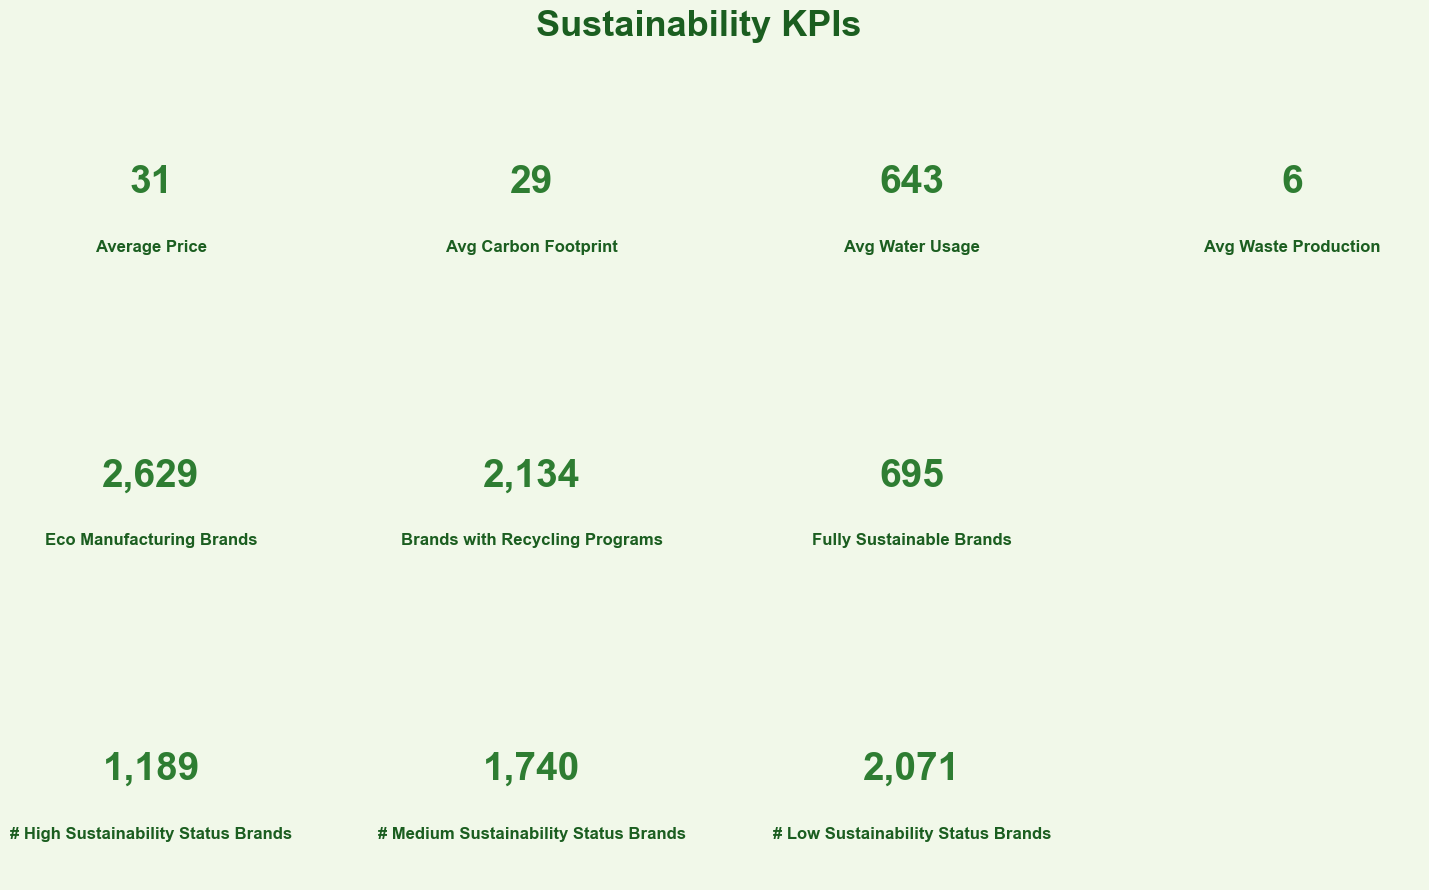

In [93]:
import matplotlib.gridspec as gridspec

# ===================== KPIs =====================
average_price = round(df["average_price"].mean())
average_footprint = round(df["carbon_footprint"].mean())
average_water_usage = round(df["water_usage"].mean())
average_waste_production = round(df["waste_production"].mean())

number_of_eco_manufacturing_brands = (df["eco_friendly_manufacturing"] == "Yes").sum()
brands_have_recycling_programs = (df["recycling_programs"] == "Yes").sum()
number_of_brands_who_are_fully_sustainable = (df["sustainability_status"] == "Fully Sustainable").sum()

number_of_high_sustainability_level_brands = (df["sustainability_level"] == "High").sum()
number_of_medium_sustainability_level_brands = (df["sustainability_level"] == "Medium").sum()
number_of_low_sustainability_level_brands = (df["sustainability_level"] == "Low").sum()

# ===================== KPI Data =====================
kpis = [
    ("Average Price", average_price),
    ("Avg Carbon Footprint", average_footprint),
    ("Avg Water Usage", average_water_usage),
    ("Avg Waste Production", average_waste_production),
    ("Eco Manufacturing Brands", number_of_eco_manufacturing_brands),
    ("Brands with Recycling Programs", brands_have_recycling_programs),
    ("Fully Sustainable Brands", number_of_brands_who_are_fully_sustainable),
    ("# High Sustainability Status Brands", number_of_high_sustainability_level_brands),
    ("# Medium Sustainability Status Brands", number_of_medium_sustainability_level_brands),
    ("# Low Sustainability Status Brands", number_of_low_sustainability_level_brands)
]

sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(18, 10))
fig.patch.set_facecolor('#F1F8E9')

# ===================== GridSpec Layout =====================
gs = gridspec.GridSpec(3, 4, figure=fig, hspace=0.6, wspace=0.5)

# ----------------- Row 1: 4 KPIs -----------------
for i in range(4):
    ax = fig.add_subplot(gs[0, i])
    ax.axis("off")
    ax.set_facecolor("#E8F5E9")
    ax.text(0.5, 0.6, f"{kpis[i][1]:,}", ha="center", va="center",
            fontsize=28, fontweight="bold", color="#2E7D32")
    ax.text(0.5, 0.25, kpis[i][0], ha="center", va="center",
            fontsize=12, fontweight="bold", color="#1B5E20")
    for spine in ax.spines.values():
        spine.set_visible(False)

# ----------------- Row 2: 3 KPIs, centered -----------------
# we use columns 0.5 offset (skip first col, use middle 3)
row2_indices = [4,5,6]
cols_row2 = [0,1,2]  # place in middle 3 columns
for idx, col in zip(row2_indices, cols_row2):
    ax = fig.add_subplot(gs[1, col])
    ax.axis("off")
    ax.set_facecolor("#E8F5E9")
    ax.text(0.5, 0.6, f"{kpis[idx][1]:,}", ha="center", va="center",
            fontsize=28, fontweight="bold", color="#2E7D32")
    ax.text(0.5, 0.25, kpis[idx][0], ha="center", va="center",
            fontsize=12, fontweight="bold", color="#1B5E20")
    for spine in ax.spines.values():
        spine.set_visible(False)

# ----------------- Row 3: 3 KPIs, centered -----------------
row3_indices = [7,8,9]
for idx, col in zip(row3_indices, cols_row2):
    ax = fig.add_subplot(gs[2, col])
    ax.axis("off")
    ax.set_facecolor("#E8F5E9")
    ax.text(0.5, 0.6, f"{kpis[idx][1]:,}", ha="center", va="center",
            fontsize=28, fontweight="bold", color="#2E7D32")
    ax.text(0.5, 0.25, kpis[idx][0], ha="center", va="center",
            fontsize=12, fontweight="bold", color="#1B5E20")
    for spine in ax.spines.values():
        spine.set_visible(False)

# ===================== Main Title =====================
fig.suptitle(" Sustainability KPIs ", fontsize=26, fontweight="bold", color="#1B5E20")

plt.show()


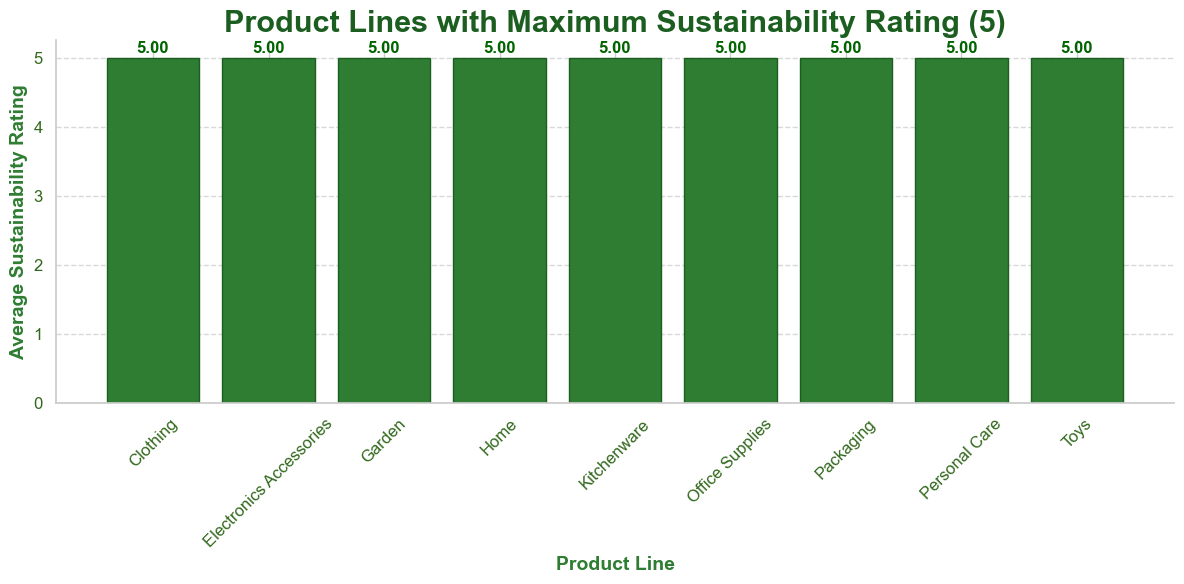

In [94]:
# Product Lines with Maximum Sustainability Rating (5)

# ================== Data Preparation ==================
# Filter: Only records with rating = 5
df_high_rating = df[df["sustainability_rating"] == 5]

# Group by product line and calculate average rating
category_avg_rating = (
    df_high_rating.groupby("product_line")["sustainability_rating"]
    .mean()
    .round(3)
    .reset_index()
    .sort_values(by="sustainability_rating", ascending=False)
)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,6))


# Normalize colors to rating values
norm = plt.Normalize(category_avg_rating["sustainability_rating"].min(),
                     category_avg_rating["sustainability_rating"].max())
colors = plt.cm.Greens(norm(category_avg_rating["sustainability_rating"]))

# Create bar plot
bars = ax.bar(
    category_avg_rating["product_line"],
    category_avg_rating["sustainability_rating"],
    color='#2E7D32',
    edgecolor="#1B5E20",
    linewidth=1
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkgreen')

# ================== Style ==================
ax.set_title("Product Lines with Maximum Sustainability Rating (5)",
             fontsize=22, color="#1B5E20", fontweight="bold")
ax.set_xlabel("Product Line", fontsize=14, color="#2E7D32", fontweight="bold")
ax.set_ylabel("Average Sustainability Rating", fontsize=14, color="#2E7D32", fontweight="bold")

ax.tick_params(axis='x', rotation=45, labelsize=12, colors="#33691E")
ax.tick_params(axis='y', labelsize=12, colors="#33691E")
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)

# Remove top and right spines for cleaner look
sns.despine(ax=ax)

plt.tight_layout()
plt.show()


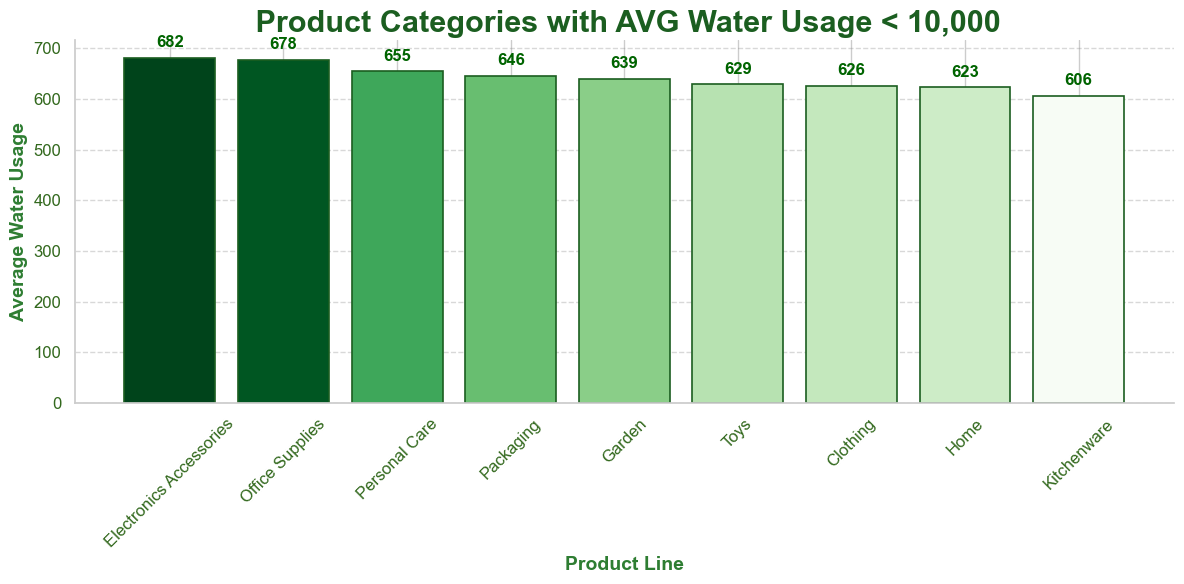

In [95]:
# Product Categories with AVG Water Usage < 10,000

# ================== Data Preparation ==================
# Group by product line and calculate average water usage
category_water_usage = (
    df.groupby("product_line")["water_usage"]
    .mean()
    .round(2)
    .reset_index()
)

# Filter categories where average water usage < 10000
category_water_usage = category_water_usage[category_water_usage["water_usage"] < 10000]

# Sort descending
category_water_usage = category_water_usage.sort_values(by="water_usage", ascending=False)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,6))


# Normalize color based on value
norm = plt.Normalize(category_water_usage["water_usage"].min(), category_water_usage["water_usage"].max())
colors = plt.cm.Greens(norm(category_water_usage["water_usage"]))

# Draw barplot
bars = ax.bar(category_water_usage["product_line"], category_water_usage["water_usage"],
              color=colors, edgecolor="#1B5E20", linewidth=1.2)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 15,  # small offset
            f'{height:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title(" Product Categories with AVG Water Usage < 10,000",
             fontsize=22, color='#1B5E20', fontweight='bold')
ax.set_xlabel("Product Line", fontsize=14, fontweight='bold', color='#2E7D32')
ax.set_ylabel("Average Water Usage", fontsize=14, fontweight='bold', color='#2E7D32')

# Grid styling
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax.tick_params(axis='x', rotation=45, labelsize=12, colors="#33691E")
ax.tick_params(axis='y', labelsize=12, colors="#33691E")
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)



# Remove top and right spines for cleaner look
sns.despine(ax=ax)

plt.tight_layout()
plt.show()


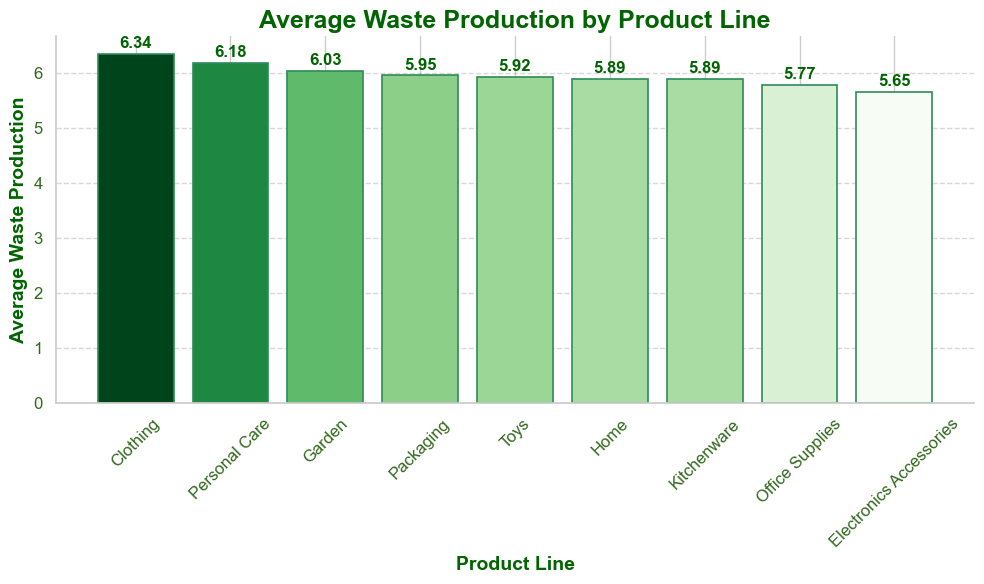

In [96]:
# Average Waste Production by Product Line

# ================== Data Preparation ==================
# Group by product line and calculate average waste production
category_waste = (
    df.groupby("product_line")["waste_production"]
    .mean()
    .round(2)
    .reset_index()
)

# Sort by waste_production descending
category_waste = category_waste.sort_values(by="waste_production", ascending=False)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))

# Normalize color based on value
norm = plt.Normalize(category_waste["waste_production"].min(), category_waste["waste_production"].max())
colors = plt.cm.Greens(norm(category_waste["waste_production"]))

# Draw barplot
bars = ax.bar(category_waste["product_line"], category_waste["waste_production"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05,
            f'{height:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title("Average Waste Production by Product Line",
             fontsize=18, color='darkgreen', fontweight='bold')
ax.set_xlabel("Product Line", fontsize=14, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Waste Production", fontsize=14, fontweight='bold', color='darkgreen')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Rotate x-axis labels and style ticks
ax.tick_params(axis='x', rotation=45, labelsize=12, colors="#33691E")
ax.tick_params(axis='y', labelsize=12, colors="#33691E")
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.3)

# Remove top and right spines for cleaner look
sns.despine(ax=ax)

plt.tight_layout()
plt.show()


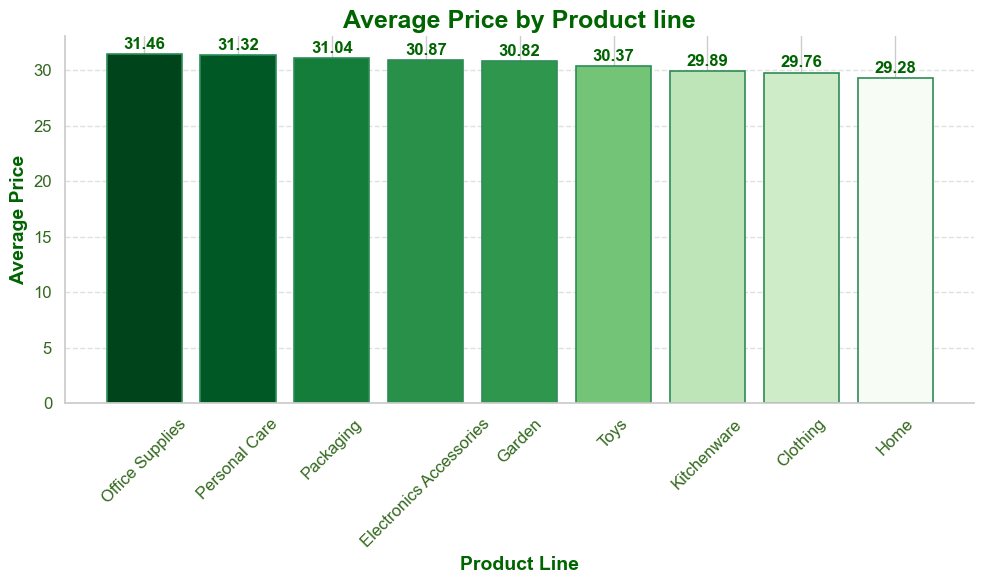

In [97]:
# Average Price by Product line

# ================== Data Preparation ==================
# Group by product line and calculate average price
category_price = (
    df.groupby("product_line")["average_price"]
    .mean()
    .round(2)
    .reset_index()
)

# Sort by average_price descending (optional)
category_price = category_price.sort_values(by="average_price", ascending=False)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))


# Normalize color based on value
norm = plt.Normalize(category_price["average_price"].min(), category_price["average_price"].max())
colors = plt.cm.Greens(norm(category_price["average_price"]))

# Draw barplot
bars = ax.bar(category_price["product_line"], category_price["average_price"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.2,
            f'{height:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title("Average Price by Product line",
             fontsize=18, color='darkgreen', fontweight='bold')
ax.set_xlabel("Product Line", fontsize=14, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Price", fontsize=14, fontweight='bold', color='darkgreen')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45, labelsize=12, colors="#33691E")
ax.tick_params(axis='y', labelsize=12, colors="#33691E")

# Remove top and right spines for cleaner look
sns.despine(ax=ax)

plt.tight_layout()
plt.show()


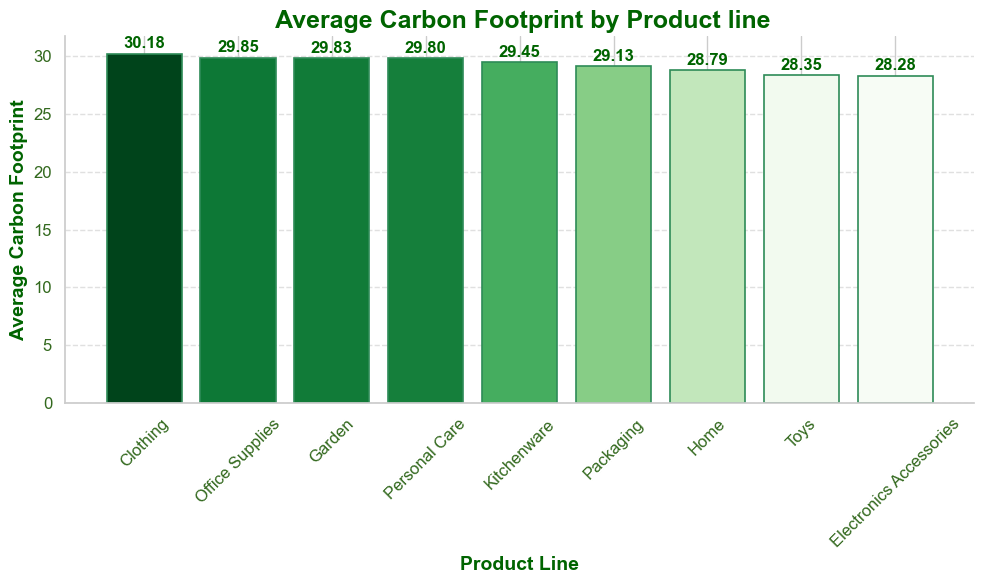

In [98]:
# Average Carbon Footprint by Product line

# ================== Data Preparation ==================
# Group by product line and calculate average carbon footprint
category_carbon = (
    df.groupby("product_line")["carbon_footprint"]
    .mean()
    .round(2)
    .reset_index()
)

# Sort by carbon footprint descending
category_carbon = category_carbon.sort_values(by="carbon_footprint", ascending=False)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))

# Normalize color based on value
norm = plt.Normalize(category_carbon["carbon_footprint"].min(), category_carbon["carbon_footprint"].max())
colors = plt.cm.Greens(norm(category_carbon["carbon_footprint"]))

# Draw barplot
bars = ax.bar(category_carbon["product_line"], category_carbon["carbon_footprint"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.2,
            f'{height:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title(" Average Carbon Footprint by Product line",
             fontsize=18, color='darkgreen', fontweight='bold')
ax.set_xlabel("Product Line", fontsize=14, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Carbon Footprint", fontsize=14, fontweight='bold', color='darkgreen')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45, labelsize=12, colors="#33691E")
ax.tick_params(axis='y', labelsize=12, colors="#33691E")

# Remove top and right spines
sns.despine(ax=ax)

plt.tight_layout()
plt.show()


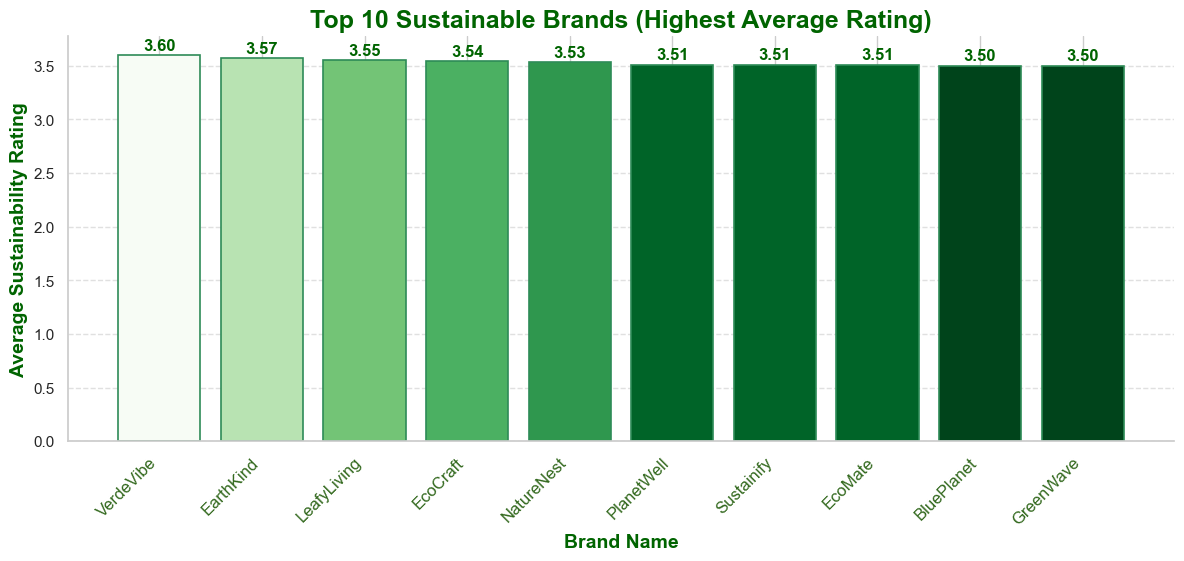

In [99]:
# Top 10 Sustainable Brands (Highest Average Rating)

# ================== Data Preparation ==================
# Calculate average rating per brand
df_top_brands = (
    df.groupby("brand_name")["sustainability_rating"]
    .mean()
    .round(2)
    .reset_index()
)

# Take top 10 brands
df_top_brands = df_top_brands.sort_values(by="sustainability_rating", ascending=False).head(10)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

# Normalize color based on rating
norm = plt.Normalize(df_top_brands["sustainability_rating"].min(), df_top_brands["sustainability_rating"].max())
colors = plt.cm.Greens_r(norm(df_top_brands["sustainability_rating"]))

# Draw bars
bars = ax.bar(df_top_brands["brand_name"], df_top_brands["sustainability_rating"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2)

# Add values above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
            f'{height:.2f}', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title("Top 10 Sustainable Brands (Highest Average Rating)",
             fontsize=18, color='darkgreen', fontweight='bold')
ax.set_xlabel("Brand Name", fontsize=14, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Sustainability Rating", fontsize=14, fontweight='bold', color='darkgreen')

# Rotate x-axis labels dynamically based on length
max_label_length = max([len(str(label)) for label in df_top_brands["brand_name"]])
rotation_angle = 45 if max_label_length > 8 else 30
ax.set_xticklabels(df_top_brands["brand_name"], rotation=rotation_angle, ha='right', fontsize=12, color='#33691E')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Remove top and right spines
sns.despine(ax=ax)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  
plt.show()


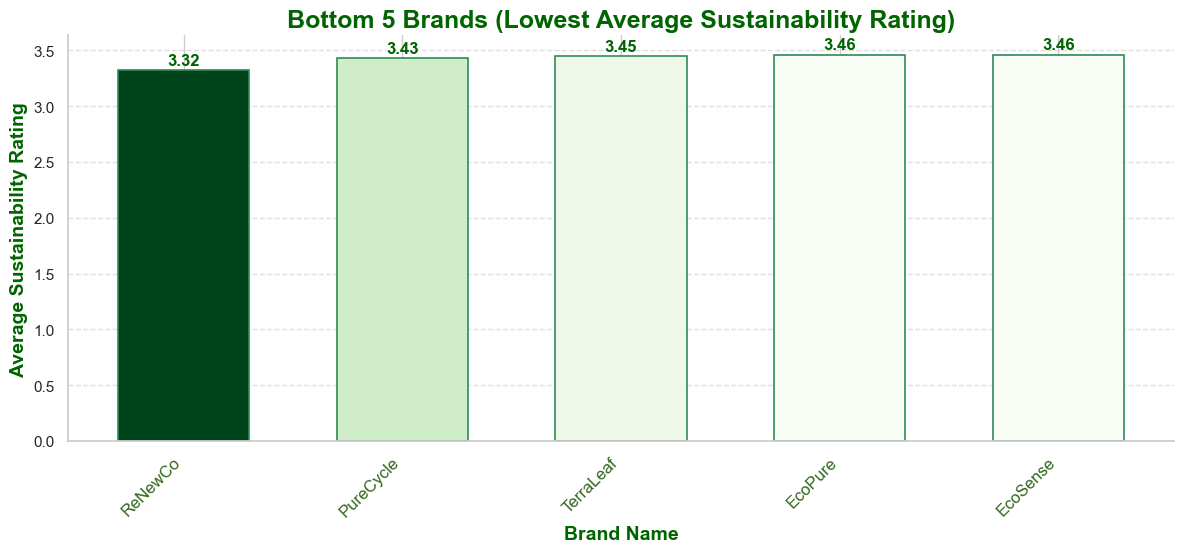

In [100]:
# Bottom 5 Brands (Lowest Average Sustainability Rating)

# ================== Data Preparation ==================
# Calculate average rating per brand
df_bottom_brands = (
    df.groupby("brand_name")["sustainability_rating"]
    .mean()
    .round(2)
    .reset_index()
)

# Take bottom 5 brands
df_bottom_brands = df_bottom_brands.sort_values(by="sustainability_rating", ascending=True).head(5)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

# Normalize color based on rating
norm = plt.Normalize(df_bottom_brands["sustainability_rating"].min(), df_bottom_brands["sustainability_rating"].max())
colors = plt.cm.Greens_r(norm(df_bottom_brands["sustainability_rating"]))

# Draw bars with smaller width
bars = ax.bar(df_bottom_brands["brand_name"], 
              df_bottom_brands["sustainability_rating"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2, width=0.6)

# Add values above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
            f'{height:.2f}', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title("Bottom 5 Brands (Lowest Average Sustainability Rating)",
             fontsize=18, color='darkgreen', fontweight='bold')
ax.set_xlabel("Brand Name", fontsize=14, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Sustainability Rating", fontsize=14, fontweight='bold', color='darkgreen')

# Rotate x-axis labels dynamically based on length
max_label_length = max([len(str(label)) for label in df_bottom_brands["brand_name"]])
rotation_angle = 45 if max_label_length > 8 else 30
ax.set_xticklabels(df_bottom_brands["brand_name"], rotation=rotation_angle, ha='right', fontsize=12, color='#33691E')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Remove top and right spines
sns.despine(ax=ax)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()


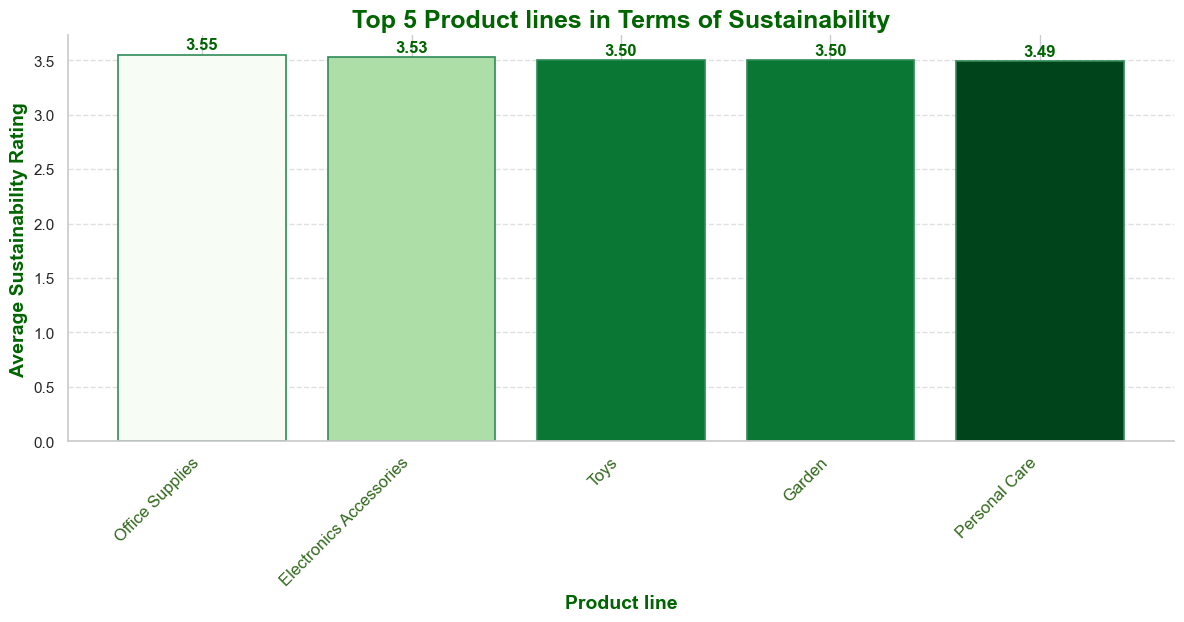

In [101]:
# Top 5 Product lines in Terms of Sustainability


# ================== Data Preparation ==================
# Calculate average rating per product category
df_top_categories = (
    df.groupby("product_line")["sustainability_rating"]
    .mean()
    .round(2)
    .reset_index()
)

# Take top 5 categories
df_top_categories = df_top_categories.sort_values(by="sustainability_rating", ascending=False).head(5)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))


# Normalize color based on rating
norm = plt.Normalize(df_top_categories["sustainability_rating"].min(), df_top_categories["sustainability_rating"].max())
colors = plt.cm.Greens_r(norm(df_top_categories["sustainability_rating"]))

# Draw bars
bars = ax.bar(df_top_categories["product_line"], df_top_categories["sustainability_rating"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2)

# Add values above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
            f'{height:.2f}', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title("Top 5 Product lines in Terms of Sustainability",
             fontsize=18, color='darkgreen', fontweight='bold')
ax.set_xlabel("Product line", fontsize=14, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Sustainability Rating", fontsize=14, fontweight='bold', color='darkgreen')

# Rotate x-axis labels dynamically based on length
max_label_length = max([len(str(label)) for label in df_top_categories["product_line"]])
rotation_angle = 45 if max_label_length > 10 else 30
ax.set_xticklabels(df_top_categories["product_line"], rotation=rotation_angle, ha='right', fontsize=12, color='#33691E')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Remove top and right spines
sns.despine(ax=ax)


plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()


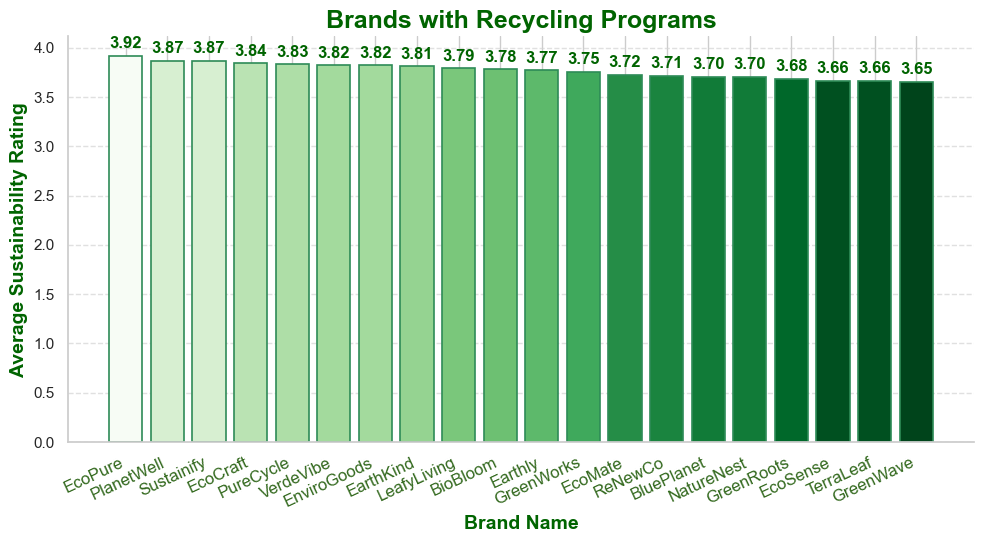

In [102]:
# Brands with Recycling Programs


# ================== Data Preparation ==================
# Filter brands that have recycling programs
df_top_recycling = df[df['recycling_programs'] == 'Yes'].copy()

# If needed, calculate average sustainability rating per brand
df_top_recycling = (
    df_top_recycling.groupby('brand_name')['sustainability_rating']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='sustainability_rating', ascending=False)
)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))


# Normalize color based on rating
norm = plt.Normalize(df_top_recycling["sustainability_rating"].min(),
                     df_top_recycling["sustainability_rating"].max())
colors = plt.cm.Greens_r(norm(df_top_recycling["sustainability_rating"]))

# Draw bars
bars = ax.bar(df_top_recycling["brand_name"], df_top_recycling["sustainability_rating"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2)

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05,
            f'{height:.2f}', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title("Brands with Recycling Programs",
             fontsize=18, color='darkgreen', fontweight='bold')
ax.set_xlabel("Brand Name", fontsize=14, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Sustainability Rating", fontsize=14, fontweight='bold', color='darkgreen')

# Rotate x-axis labels if necessary
ax.set_xticklabels(df_top_recycling["brand_name"], rotation=25, ha='right', fontsize=12, color='#33691E')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
sns.despine(ax=ax)



plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()


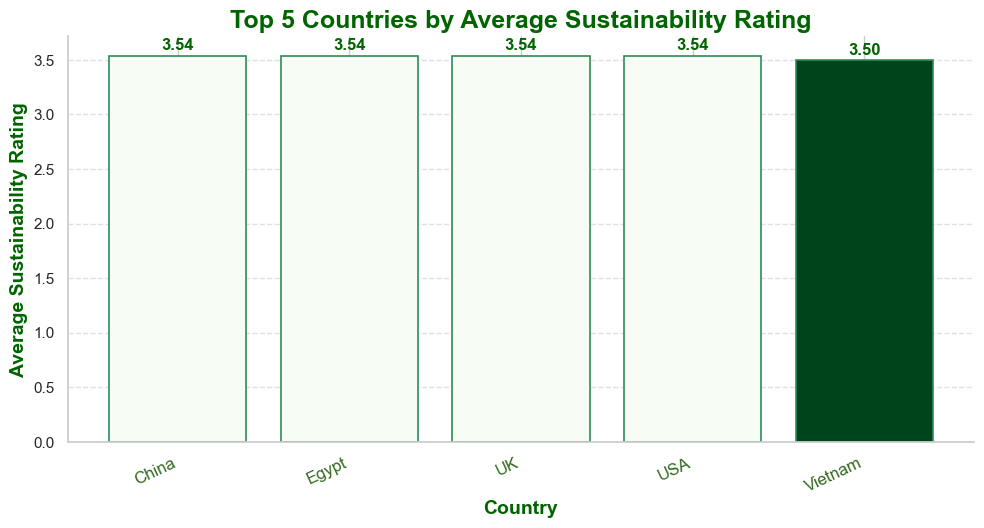

In [103]:
# Top 5 Countries by Average Sustainability Rating


# ================== Data Preparation ==================
# Group by country and calculate average sustainability rating
df_top_countries = (
    df.groupby("country_name")["sustainability_rating"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="sustainability_rating", ascending=False)
    .head(5)  # take top 5 countries
)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))


# Normalize color based on value
norm = plt.Normalize(df_top_countries["sustainability_rating"].min(),
                     df_top_countries["sustainability_rating"].max())
colors = plt.cm.Greens_r(norm(df_top_countries["sustainability_rating"]))

# Draw barplot
bars = ax.bar(df_top_countries["country_name"], df_top_countries["sustainability_rating"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2)

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
            f"{height:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title("Top 5 Countries by Average Sustainability Rating",
             fontsize=18, color='darkgreen', fontweight='bold')
ax.set_xlabel("Country", fontsize=14, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Sustainability Rating", fontsize=14, fontweight='bold', color='darkgreen')

# Rotate x-axis labels for readability
ax.set_xticklabels(df_top_countries["country_name"], rotation=25, ha='right', fontsize=12, color='#33691E')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
sns.despine(ax=ax)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()


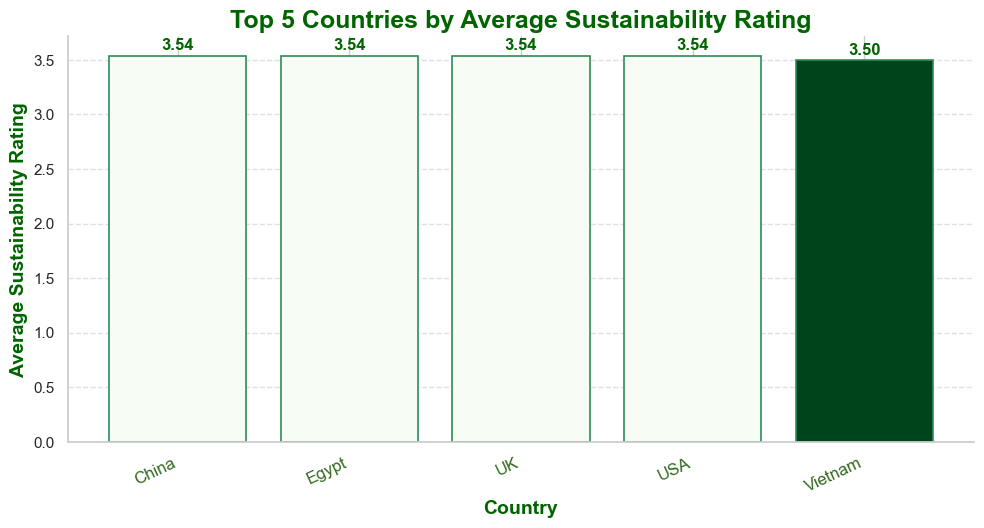

In [104]:
# Top 5 Countries by Average Sustainability Rating

# ================== Data Preparation ==================
# Group by country and calculate average sustainability rating
df_top_countries = (
    df.groupby("country_name")["sustainability_rating"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="sustainability_rating", ascending=False)
    .head(5)  # take top 5 countries
)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))


# Normalize color based on value
norm = plt.Normalize(df_top_countries["sustainability_rating"].min(),
                     df_top_countries["sustainability_rating"].max())
colors = plt.cm.Greens_r(norm(df_top_countries["sustainability_rating"]))

# Draw barplot
bars = ax.bar(df_top_countries["country_name"], df_top_countries["sustainability_rating"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2)

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
            f"{height:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title("Top 5 Countries by Average Sustainability Rating",
             fontsize=18, color='darkgreen', fontweight='bold')
ax.set_xlabel("Country", fontsize=14, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Sustainability Rating", fontsize=14, fontweight='bold', color='darkgreen')

# Rotate x-axis labels for readability
ax.set_xticklabels(df_top_countries["country_name"], rotation=25, ha='right', fontsize=12, color='#33691E')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
sns.despine(ax=ax)


plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()


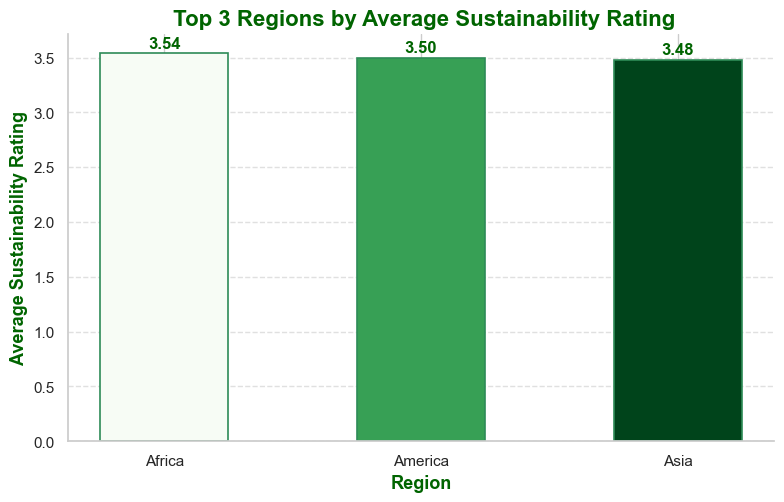

In [105]:
# Top 3 Regions by Average Sustainability Rating

# ================== Data Preparation ==================
# Group by region and calculate average sustainability rating
df_region_avg = (
    df.groupby("region")["sustainability_rating"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="sustainability_rating", ascending=False)
    .head(3)  # take top 3 regions
)

# ================== Visualization ==================
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))


# Normalize color based on value
norm = plt.Normalize(df_region_avg["sustainability_rating"].min(),
                     df_region_avg["sustainability_rating"].max())
colors = plt.cm.Greens_r(norm(df_region_avg["sustainability_rating"]))

# Draw barplot
bars = ax.bar(df_region_avg["region"], df_region_avg["sustainability_rating"],
              color=colors, edgecolor="#2E8B57", linewidth=1.2, width=0.5) 


# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
            f"{height:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkgreen')

# Titles and labels
ax.set_title(" Top 3 Regions by Average Sustainability Rating",
             fontsize=16, color='darkgreen', fontweight='bold')
ax.set_xlabel("Region", fontsize=13, fontweight='bold', color='darkgreen')
ax.set_ylabel("Average Sustainability Rating", fontsize=13, fontweight='bold', color='darkgreen')

# Grid styling
ax.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
sns.despine(ax=ax)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()


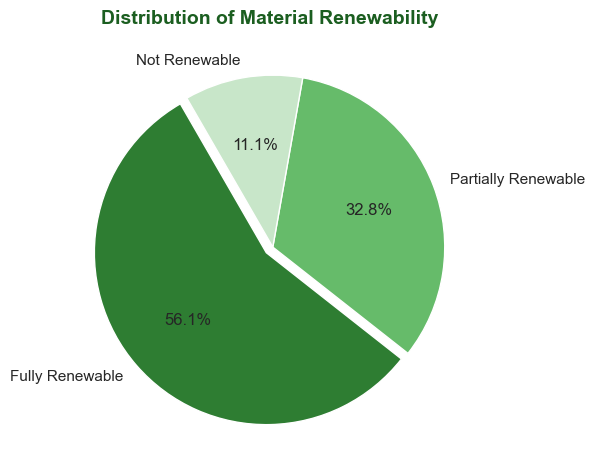

In [106]:
# Distribution of Material Renewability

# ================== Data Preparation ==================
# Count materials by their renewability status
status_count = df['material_status'].value_counts().reset_index()
status_count.columns = ['material_status', 'count']

# Define consistent colors
colors = {
    'Fully Renewable': '#2E7D32',      # dark green
    'Partially Renewable': '#66BB6A',  # medium green
    'Not Renewable': '#C8E6C9'         # light green
}

# Create explode list to highlight "Fully Renewable"
explode = [0.05 if status=='Fully Renewable' else 0 for status in status_count['material_status']]

# ====================== Pie Chart ======================
plt.figure(figsize=(6, 6))
plt.pie(
    status_count['count'],
    labels=status_count['material_status'],
    autopct='%1.1f%%',
    colors=[colors[status] for status in status_count['material_status']],
    startangle=120,
    explode=explode
)

plt.title('Distribution of Material Renewability ', fontsize=14, fontweight='bold', color='#1B5E20')
plt.tight_layout()
plt.show()


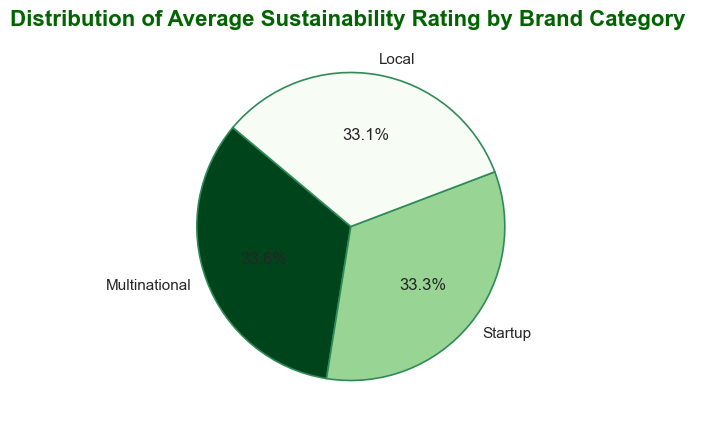

In [107]:
#Distribution of Average Sustainability Rating by Brand Category  

# ================== Data Preparation ==================
# Calculate average sustainability rating per brand category
category_avg = (
    df.groupby("brand_category")["sustainability_rating"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="sustainability_rating", ascending=False)  # optional: sort descending
)



# Normalize color based on value
norm = plt.Normalize(category_avg["sustainability_rating"].min(), category_avg["sustainability_rating"].max())
colors = plt.cm.Greens(norm(category_avg["sustainability_rating"]))

# ================== Pie Chart ==================
plt.figure(figsize=(5,5))

# Colors gradient based on rating
colors = plt.cm.Greens(norm(category_avg["sustainability_rating"]))

plt.pie(category_avg["sustainability_rating"],
        labels=category_avg["brand_category"],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor':'#2E8B57', 'linewidth':1.2}
       )

plt.title("Distribution of Average Sustainability Rating by Brand Category ",
          fontsize=16, fontweight='bold', color='darkgreen')

plt.show()


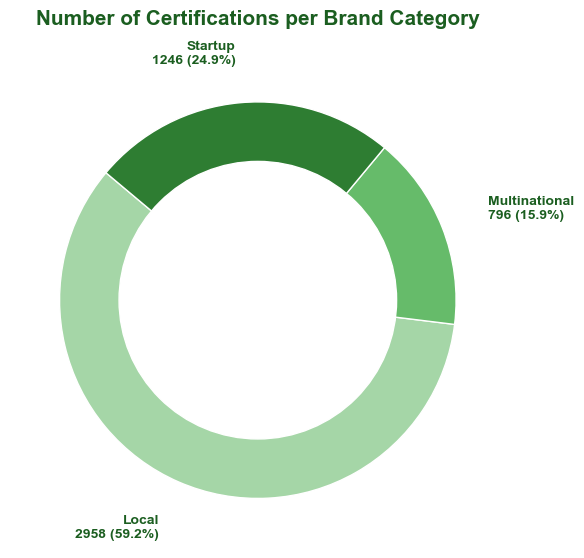

In [108]:
# Number of Certifications per Brand Category

# ================== Data Preparation ==================

# Calculate the number of certifications per brand category
df_category_cert = df.groupby('brand_category')['certification'].count().reset_index()
df_category_cert.columns = ['brand_category', 'number_of_certifications']

# ================== Visualization (Donut Chart) ==================

# Define 3 shades of green (light → medium → dark)
colors = ['#A5D6A7', '#66BB6A', '#2E7D32']

plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(
    df_category_cert["number_of_certifications"],
    labels=None,  # Hide default labels inside slices
    startangle=140,
    colors=colors * (len(df_category_cert)//3 + 1),
    wedgeprops=dict(width=0.35, edgecolor='white')  # Donut style
)

# Add white circle in the middle to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Total number of certifications
total = df_category_cert["number_of_certifications"].sum()

# Add custom labels outside each wedge
for i, p in enumerate(wedges):
    angle = (p.theta2 + p.theta1) / 2
    x = 1.25 * np.cos(np.radians(angle))
    y = 1.25 * np.sin(np.radians(angle))
    
    ha = 'left' if x > 0 else 'right'
    va = 'center'
    
    plt.text(
        x, y,
        f"{df_category_cert['brand_category'].iloc[i]}\n"
        f"{df_category_cert['number_of_certifications'].iloc[i]} "
        f"({df_category_cert['number_of_certifications'].iloc[i] / total * 100:.1f}%)",
        ha=ha, va=va, fontsize=10, fontweight='bold', color='#1B5E20'
    )



# Chart title
plt.title("Number of Certifications per Brand Category",
          fontsize=15, color='#1B5E20', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


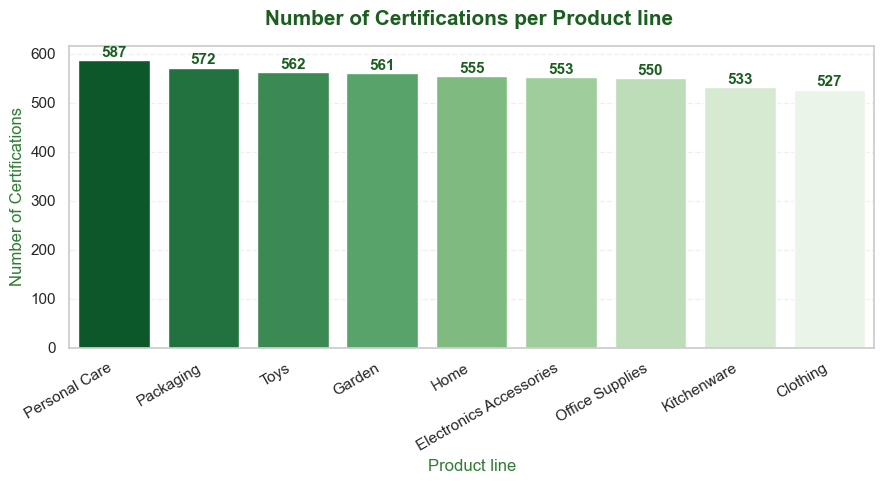

In [109]:
# Number of Certifications per Product line

# ================== Data Preparation ==================
# Group by product category and count certifications
df_category_cert = (
    df.groupby("product_line")["certification"]
    .count()  # أو sum إذا كان العمود رقمي
    .reset_index()
    .rename(columns={"certification": "num_certification"})
    .sort_values(by="num_certification", ascending=False)
)

# ================== Visualization ==================
plt.figure(figsize=(9, 5))
sns.barplot(
    data=df_category_cert,
    x='product_line',
    y='num_certification',
    palette='Greens_r'
)

# Add value labels above each bar
for index, value in enumerate(df_category_cert['num_certification']):
    plt.text(index, value + 0.2, str(value),
             ha='center', va='bottom', fontsize=11,
             color='#1B5E20', fontweight='bold')

# Styling
plt.title('Number of Certifications per Product line ',
          fontsize=15, color='#1B5E20', pad=15, fontweight='bold')
plt.xlabel('Product line', fontsize=12, color='#2E7D32')
plt.ylabel('Number of Certifications', fontsize=12, color='#2E7D32')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


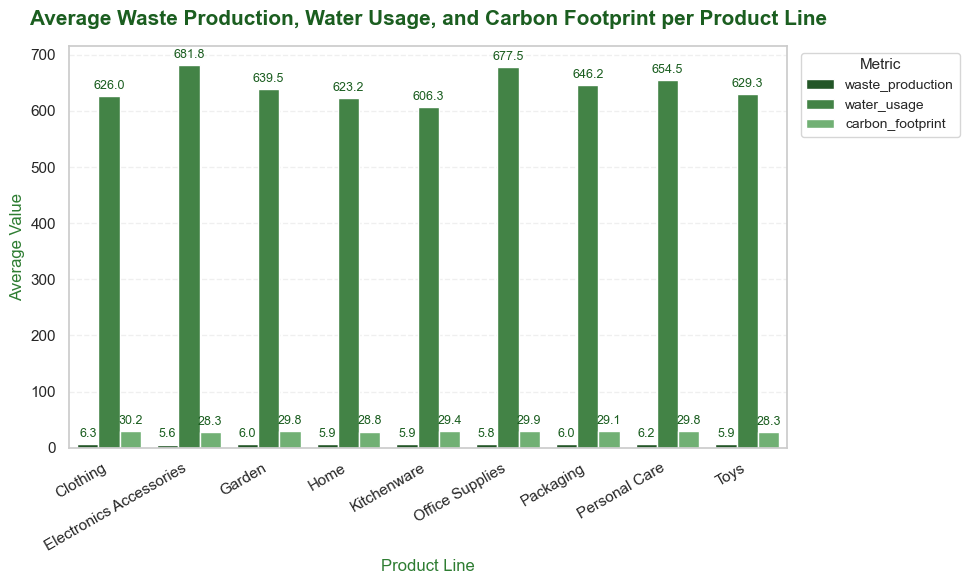

In [110]:
# Average Waste Production, Water Usage, and Carbon Footprint per Product Line


# ================== Data Preparation ==================
# Group by product_category and calculate mean
df_avg = df.groupby('product_line')[['waste_production', 'water_usage', 'carbon_footprint']].mean().reset_index()

# Melt the dataframe to long format for seaborn
df_melted = df_avg.melt(id_vars='product_line',
                        value_vars=['waste_production', 'water_usage', 'carbon_footprint'],
                        var_name='Metric',
                        value_name='Average Value')

# ================== Visualization ==================
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melted,
    x='product_line',
    y='Average Value',
    hue='Metric',
    palette=['#1B5E20', '#388E3C', '#66BB6A']  # dark to light green
)

# Add value labels above each bar
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, color='#1B5E20', padding=3)

# Styling
plt.title('Average Waste Production, Water Usage, and Carbon Footprint per Product Line',
          fontsize=15, color='#1B5E20', pad=15, fontweight='bold')
plt.xlabel('Product Line', fontsize=12, color='#2E7D32')
plt.ylabel('Average Value', fontsize=12, color='#2E7D32')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)


plt.legend(title='Metric', title_fontsize=11, fontsize=10,
           loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


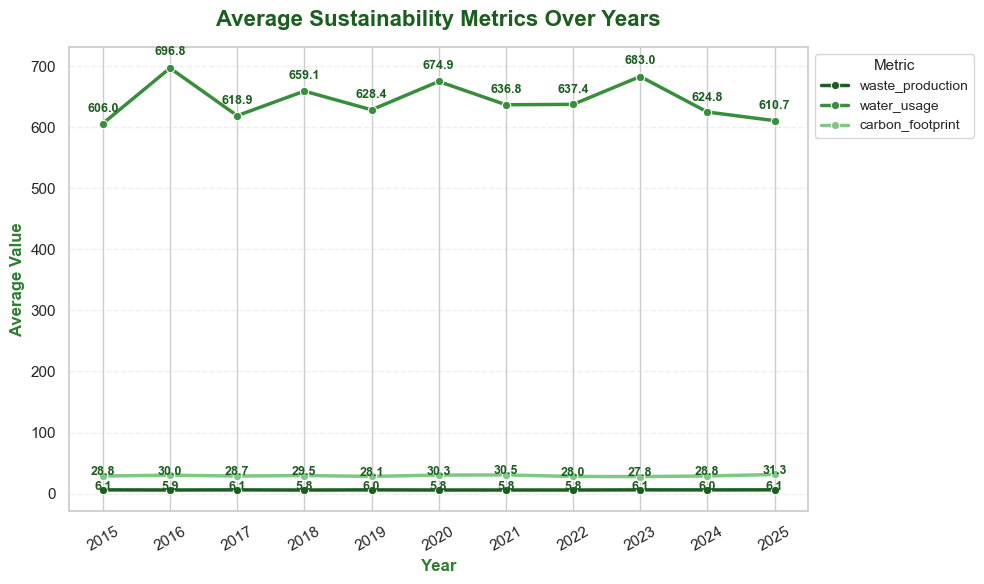

In [111]:
#Average Sustainability Metrics Over Years

# ====== Compute yearly averages for each sustainability metric ======
df_avg_metrics = df.groupby('year')[['waste_production', 'water_usage', 'carbon_footprint']].mean().reset_index()

# Melt the dataframe for Seaborn
df_melted = df_avg_metrics.melt(id_vars='year',
                                value_vars=['waste_production', 'water_usage', 'carbon_footprint'],
                                var_name='Metric',
                                value_name='Average Value')

# ====== Visualization ======
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_melted,
    x='year',
    y='Average Value',
    hue='Metric',
    marker='o',
    linewidth=2.5,
    palette=['#1B5E20', '#388E3C', '#81C784']  # green shades
)

# Add value labels above each point (non-overlapping and visible)
for metric in df_melted['Metric'].unique():
    subset = df_melted[df_melted['Metric'] == metric]
    for x, y in zip(subset['year'], subset['Average Value']):
        plt.text(x, y + (0.03 * y), f'{y:.1f}',
                 ha='center', fontsize=9, fontweight='bold', color='#1B5E20')

# ====== Styling ======
plt.title('Average Sustainability Metrics Over Years',
          fontsize=16, color='#1B5E20', fontweight='bold', pad=15)
plt.xlabel('Year', fontsize=12, color='#2E7D32', fontweight='bold')
plt.ylabel('Average Value', fontsize=12, color='#2E7D32', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(df_avg_metrics['year'], rotation=30)

# Legend outside the plot
plt.legend(title='Metric', title_fontsize=11, fontsize=10,
           loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


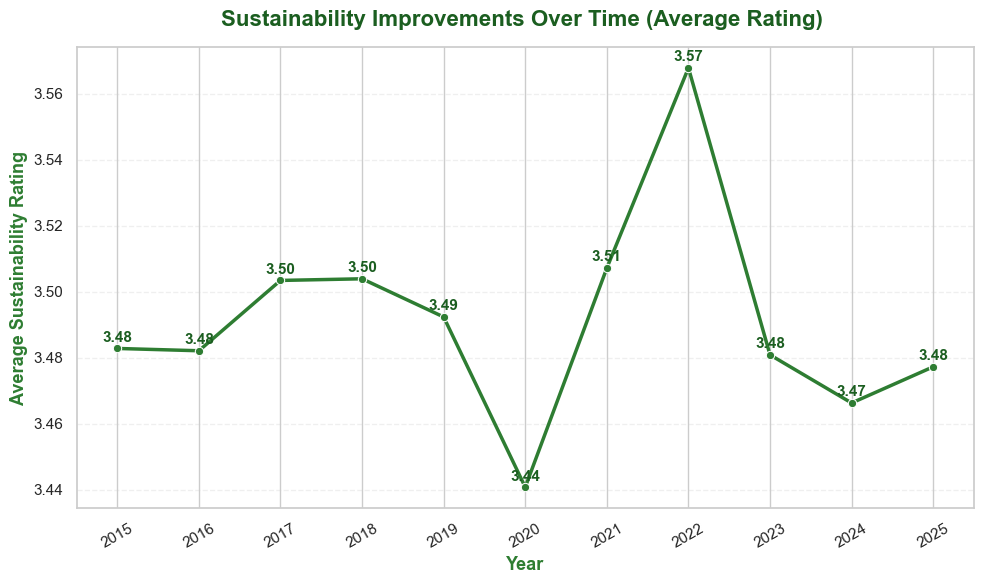

In [112]:
#Sustainability Improvements Over Time (Average Rating)

df_avg = df.groupby('year')['sustainability_rating'].mean().reset_index(name='avg_rating')

# =====  Visualization =====
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_avg,
    x='year',
    y='avg_rating',
    marker='o',              # Show points for each year
    color='#2E7D32',         # Dark green line
    linewidth=2.5
)

# Add value labels above each point
for x, y in zip(df_avg['year'], df_avg['avg_rating']):
    plt.text(x, y + 0.002, f"{y:.2f}", ha='center', fontsize=11, fontweight='bold', color='#1B5E20')

# Styling
plt.title("Sustainability Improvements Over Time (Average Rating) ",
          fontsize=16, color="#1B5E20", fontweight='bold', pad=15)
plt.xlabel("Year", fontsize=13, color="#2E7D32", fontweight='bold')
plt.ylabel("Average Sustainability Rating", fontsize=13, color="#2E7D32", fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(df_avg['year'], rotation=30)
plt.tight_layout()
plt.show()


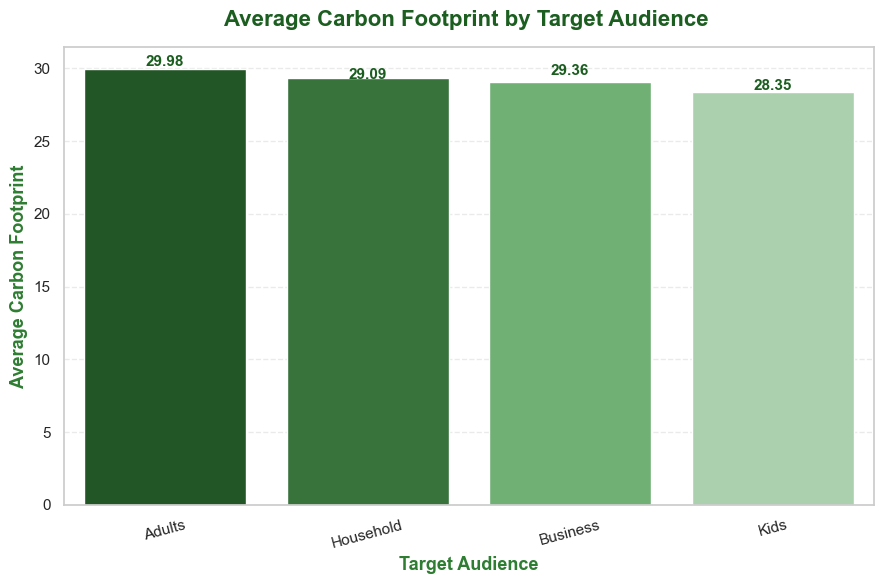

In [113]:
# ======== Average Carbon Footprint by Target Audience ==========
audience_carbon = (
    df.groupby('target_audience')['carbon_footprint']
      .mean()
      .round(2)
      .reset_index()
      .sort_values(by='carbon_footprint', ascending=False)
)

# ======== Visualization ==========
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))

# Create barplot using the same green palette
ax = sns.barplot(
    data=audience_carbon,
    x='target_audience',
    y='carbon_footprint',
    palette=['#1B5E20', '#2E7D32', '#66BB6A', '#A5D6A7']
)

# Add value labels above each bar
for index, row in audience_carbon.iterrows():
    plt.text(index, row['carbon_footprint'] + 0.2,  # position label slightly above bar
             f"{row['carbon_footprint']:.2f}",
             ha='center', fontsize=11, fontweight='bold', color='#1B5E20')

# ======== Styling ==========
plt.title('Average Carbon Footprint by Target Audience ',
          fontsize=16, color='#1B5E20', fontweight='bold', pad=15)
plt.xlabel('Target Audience', fontsize=13, color='#2E7D32', fontweight='bold')
plt.ylabel('Average Carbon Footprint', fontsize=13, color='#2E7D32', fontweight='bold')
plt.xticks(rotation=15, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()


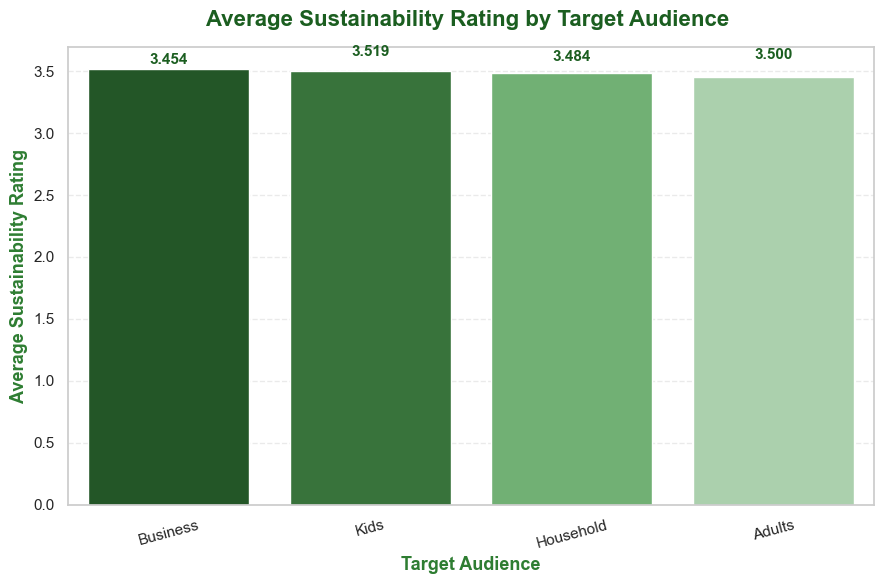

In [114]:
# ======== Average Sustainability Rating by Target Audience ==========
audience_sustainability = (
    df.groupby('target_audience')['sustainability_rating']
      .mean()
      .round(3)
      .reset_index()
      .sort_values(by='sustainability_rating', ascending=False)
)

# ======== Visualization ==========
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))

# Create barplot with consistent green palette
ax = sns.barplot(
    data=audience_sustainability,
    x='target_audience',
    y='sustainability_rating',
    palette=['#1B5E20', '#2E7D32', '#66BB6A', '#A5D6A7']  # dark to light green
)

# Add value labels above each bar
for index, row in audience_sustainability.iterrows():
    plt.text(index, row['sustainability_rating'] + 0.10,  # small offset above bar
             f"{row['sustainability_rating']:.3f}",
             ha='center', fontsize=11, fontweight='bold', color='#1B5E20')

# ======== Styling ==========
plt.title('Average Sustainability Rating by Target Audience ',
          fontsize=16, color='#1B5E20', fontweight='bold', pad=15)
plt.xlabel('Target Audience', fontsize=13, color='#2E7D32', fontweight='bold')
plt.ylabel('Average Sustainability Rating', fontsize=13, color='#2E7D32', fontweight='bold')
plt.xticks(rotation=15, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()


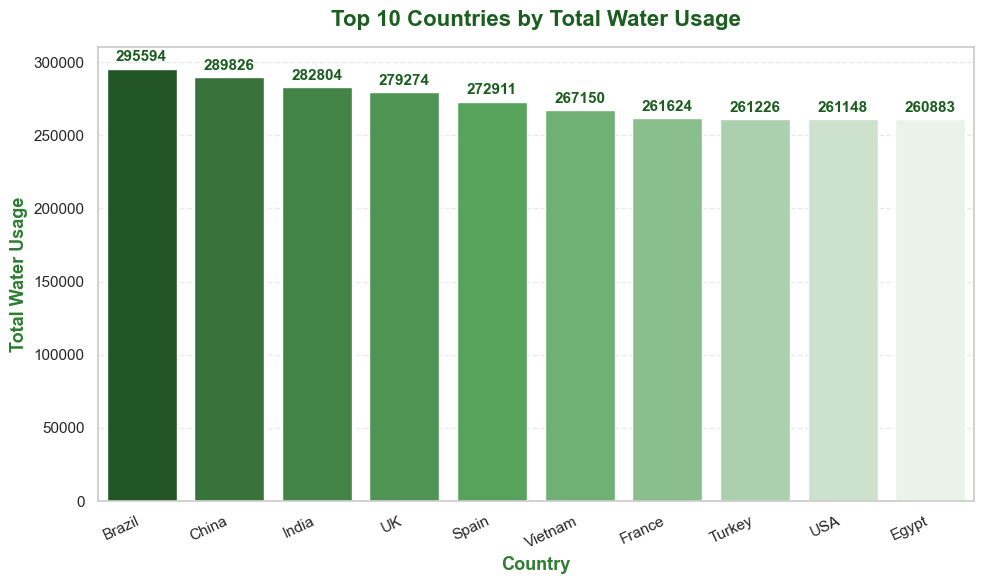

In [115]:
# ======== Top 10 Countries by Total Water Usage ==========
country_water_usage = (
    df.groupby('country_name')['water_usage']
      .sum()
      .reset_index()
      .sort_values(by='water_usage', ascending=False)
      .head(10)
)

# ======== Visualization ==========
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot with green gradient palette
ax = sns.barplot(
    data=country_water_usage,
    x='country_name',
    y='water_usage',
    palette=['#1B5E20', '#2E7D32', '#388E3C', '#43A047', '#4CAF50',
             '#66BB6A', '#81C784', '#A5D6A7', '#C8E6C9', '#E8F5E9']
)

# ======== Add value labels directly above each bar ==========
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,        # center of each bar
        p.get_height() + (0.01 * max(country_water_usage['water_usage'])),  # slightly above
        f"{p.get_height():.0f}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='#1B5E20'
    )

# ======== Styling ==========
plt.title('Top 10 Countries by Total Water Usage', fontsize=16, color='#1B5E20', fontweight='bold', pad=15)
plt.xlabel('Country', fontsize=13, color='#2E7D32', fontweight='bold')
plt.ylabel('Total Water Usage', fontsize=13, color='#2E7D32', fontweight='bold')
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()


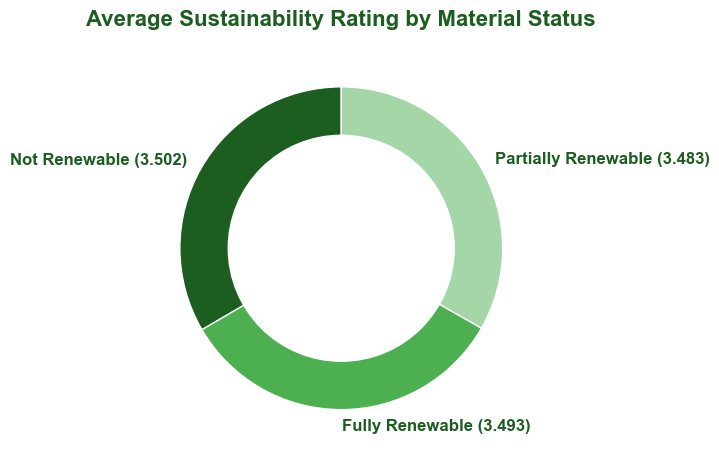

In [116]:
# ======== Average Sustainability Rating by Material Status ==========
material_sustainability = (
    df.groupby('material_status')['sustainability_rating']
      .mean()
      .round(3)
      .reset_index()
      .sort_values(by='sustainability_rating', ascending=False)
)

# Combine label and value to prevent overlap
material_sustainability['label'] = (
    material_sustainability['material_status'] + 
    ' (' + material_sustainability['sustainability_rating'].astype(str) + ')'
)

# ======== Visualization (Donut Chart) ==========
plt.figure(figsize=(7, 7))
colors = ['#1B5E20', '#4CAF50', '#A5D6A7']

# Create pie chart with combined labels
wedges, texts = plt.pie(
    material_sustainability['sustainability_rating'],
    labels=material_sustainability['label'],
    startangle=90,
    colors=colors,
    textprops={'color': '#1B5E20', 'fontsize': 12, 'fontweight': 'bold'}
)

# Add white circle in the center (donut effect)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# ======== Styling ==========
plt.title('Average Sustainability Rating by Material Status',
          fontsize=16, color='#1B5E20', fontweight='bold', pad=15)
plt.tight_layout()

plt.show()


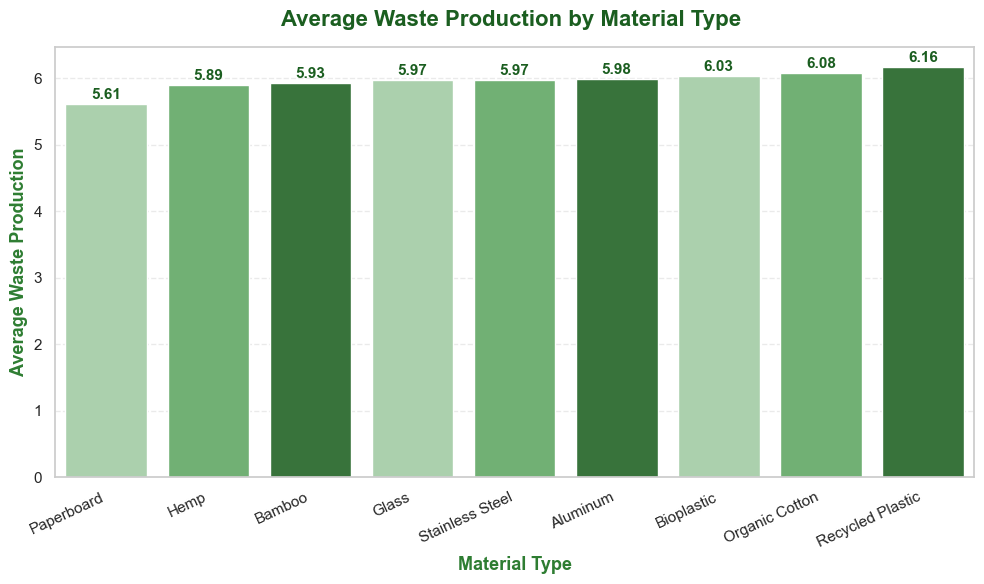

In [117]:
# ======== Average Waste Production by Material Type ==========
material_waste = (
    df.groupby('material_type')['waste_production']
      .mean()
      .round(2)
      .reset_index()
      .sort_values(by='waste_production', ascending=True)
)

# ======== Visualization ==========
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot with green gradient palette
ax = sns.barplot(
    data=material_waste,
    x='material_type',
    y='waste_production',
    palette=['#A5D6A7', '#66BB6A', '#2E7D32']
)

# ======== Add accurate value labels above each bar ==========
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,     # center horizontally
        height + 0.005 * max(material_waste['waste_production']),  # slight offset above bar
        f'{height:.2f}',
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='#1B5E20'
    )

# ======== Styling ==========
plt.title('Average Waste Production by Material Type ',
          fontsize=16, color='#1B5E20', fontweight='bold', pad=15)
plt.xlabel('Material Type', fontsize=13, color='#2E7D32', fontweight='bold')
plt.ylabel('Average Waste Production', fontsize=13, color='#2E7D32', fontweight='bold')
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()


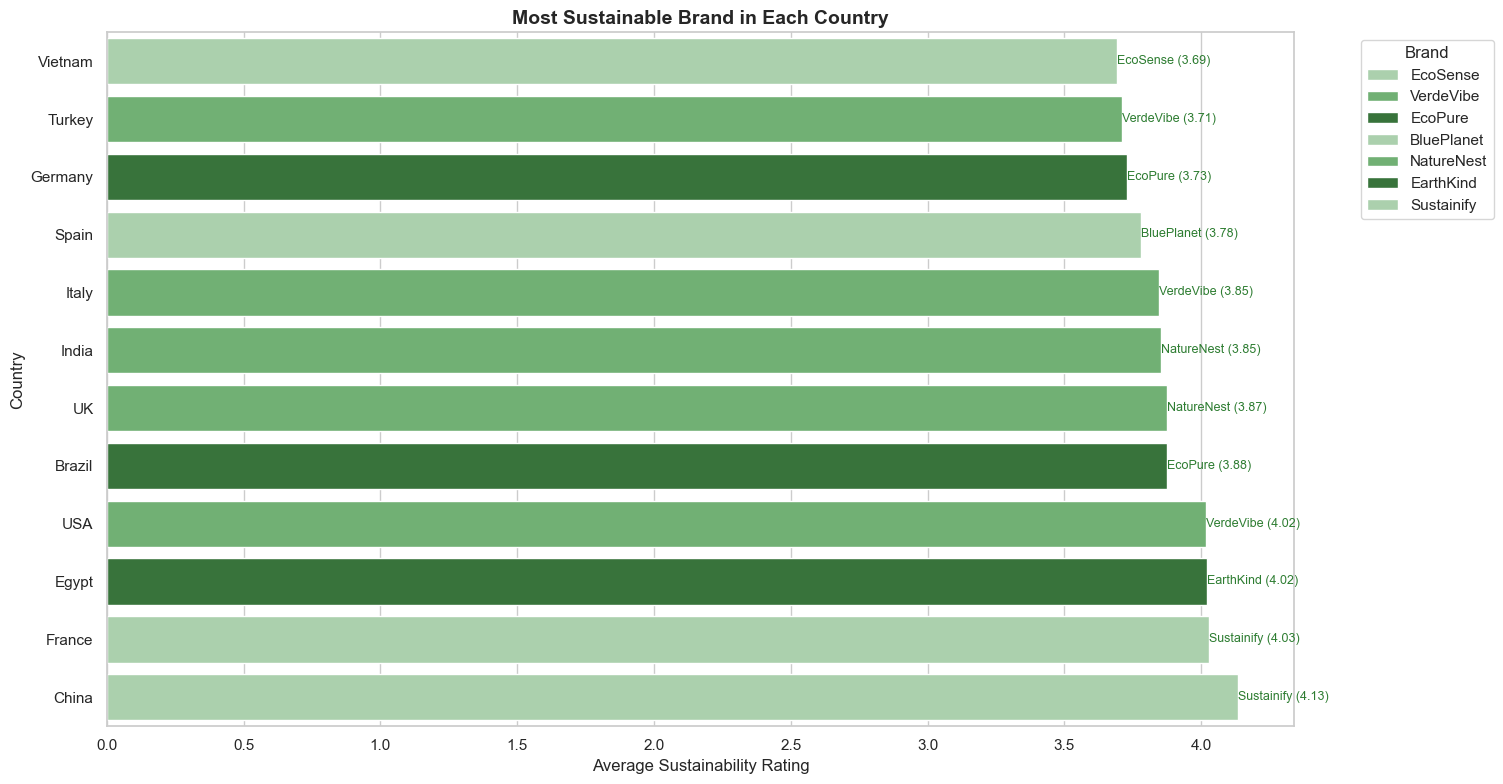

In [118]:
# Most Sustainable Brand in Each Country

# Prepare the data
df = sustainability_fact.copy()
df["brand_name"] = df["brand_id"].map(brand_dim.set_index("brand_id")["brand_name"])
df["country_name"] = df["country_id"].map(country_dim.set_index("country_id")["country_name"])

avg_rating_df = (
    df.groupby(["country_name", "brand_name"], as_index=False)
      .agg(avg_rating=("sustainability_rating", "mean"))
      .sort_values(["country_name", "avg_rating"], ascending=[True, False])
)

top_brands = avg_rating_df.groupby("country_name").head(1)

# Set style and figure size (wider figure)
sns.set_style("whitegrid")
plt.figure(figsize=(18, 8)) 

# Create horizontal barplot
barplot = sns.barplot(
    data=top_brands.sort_values("avg_rating", ascending=True),
    x="avg_rating",
    y="country_name",
    hue="brand_name",
    palette=["#A5D6A7", "#66BB6A", "#2E7D32"]
)

# Add labels above bars
sorted_df = top_brands.sort_values("avg_rating", ascending=True).reset_index(drop=True)
for i, row in enumerate(sorted_df.itertuples()):
    plt.text(
        row.avg_rating,       
        i + 0.1,             
        f"{row.brand_name} ({row.avg_rating:.2f})",
        ha='left',
        va='bottom',
        fontsize=9,
        color='#2E7D32',      
        fontweight='medium'
    )

# Final styling
plt.title("Most Sustainable Brand in Each Country", fontsize=14, fontweight='bold')
plt.xlabel("Average Sustainability Rating", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Move legend outside the figure on the right
plt.legend(
    title="Brand",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),  
    frameon=True
)

plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()


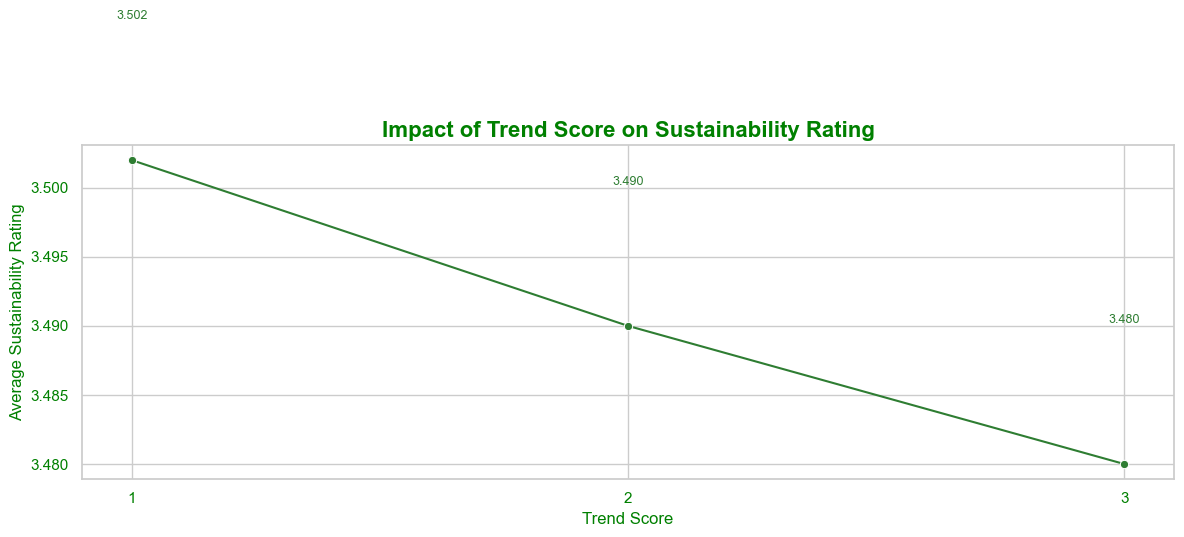

In [119]:
# Impact of Trend Score on Sustainability Rating

sustainability_fact["trend_score"] = sustainability_fact["market_trend_id"].map(
    market_trend_dim.set_index("market_trend_id")["trend_score"]
)


# Calculate average sustainability rating per trend_score

trend_impact = (
    sustainability_fact.groupby("trend_score", as_index=False)
    .agg(avg_rating=("sustainability_rating", "mean"))
)

# Round values to 3 decimal places
trend_impact["avg_rating"] = trend_impact["avg_rating"].round(3)

# Sort X-axis in ascending order
trend_impact = trend_impact.sort_values("trend_score", ascending=True)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Line plot with markers
sns.lineplot(
    data=trend_impact,
    x="trend_score",
    y="avg_rating",
    marker="o",
    color="#2E7D32"
)

# Add text labels above points
for i, row in trend_impact.iterrows():
    plt.text(
        row["trend_score"], 
        row["avg_rating"] + 0.01,  # slight vertical offset
        f"{row['avg_rating']:.3f}",
        ha='center',
        va='bottom',
        fontsize=9,
        color="#2E7D32"
    )
# Labels and title
plt.title("Impact of Trend Score on Sustainability Rating", fontsize=16, fontweight='bold',color='green')
plt.xlabel("Trend Score", fontsize=12,color='green')
plt.ylabel("Average Sustainability Rating", fontsize=12,color='green')

# Change axis tick labels color
plt.tick_params(axis='x', colors='green')  # X-axis labels in green
plt.tick_params(axis='y', colors='green')  # Y-axis labels in green


plt.xticks(trend_impact["trend_score"])  # ensure all trend_score values are shown
plt.tight_layout()
plt.show()


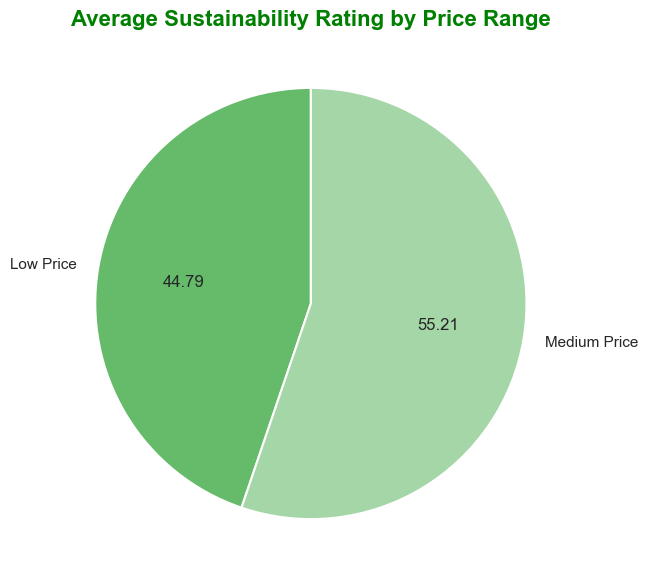

In [120]:
# Average Sustainability Rating by Price Range

#  Create price_range column based on average_price
def classify_price(price):
    if price < 50:
        return "Low Price"
    elif 50 <= price <= 150:
        return "Medium Price"
    else:
        return "High Price"

sustainability_fact["price_range"] = sustainability_fact["average_price"].apply(classify_price)

#  Calculate average sustainability rating per price range

price_sustainability = (
    sustainability_fact.groupby("price_range", as_index=False)
    .agg(avg_rating=("sustainability_rating", "mean"))
)

# Round to 3 decimal places
price_sustainability["avg_rating"] = price_sustainability["avg_rating"].round(3)

# Sort by price order: Low → Medium → High
price_order = ["Low Price", "Medium Price", "High Price"]
price_sustainability["price_range"] = pd.Categorical(price_sustainability["price_range"], categories=price_order, ordered=True)
price_sustainability = price_sustainability.sort_values("price_range")


# Pie Chart
colors = ["#66BB6A", "#A5D6A7", "#2E7D32"] 

plt.figure(figsize=(7, 7))
plt.pie(
    price_sustainability["avg_rating"],
    labels=price_sustainability["price_range"],
    autopct="%1.2f",  # show values with 2 decimals
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1.5}
)

plt.title("Average Sustainability Rating by Price Range", fontsize=16, fontweight='bold',color='green')
plt.show()


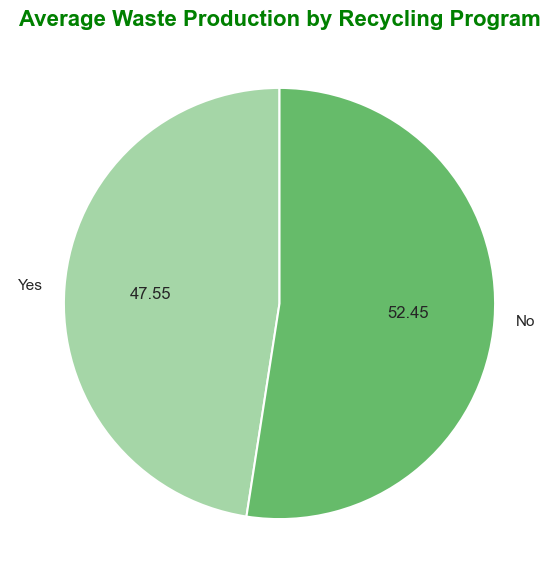

In [121]:
# Calculate average waste per recycling program
recycling_waste = (
    sustainability_fact.groupby("recycling_programs", as_index=False)
    .agg(avg_waste=("waste_production", "mean"))
)
recycling_waste["avg_waste"] = recycling_waste["avg_waste"].round(2)

# Sort ascending by avg_waste
recycling_waste = recycling_waste.sort_values("avg_waste", ascending=True)

# Define green colors (light → medium → dark)
green_colors = ["#A5D6A7", "#66BB6A", "#2E7D32"]
colors = [green_colors[i % len(green_colors)] for i in range(len(recycling_waste))]

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    recycling_waste["avg_waste"],
    labels=recycling_waste["recycling_programs"],
    autopct="%1.2f",  # show values with 2 decimals
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1.5}
)

plt.title("Average Waste Production by Recycling Program", fontsize=16, fontweight='bold',color="green")
plt.show()


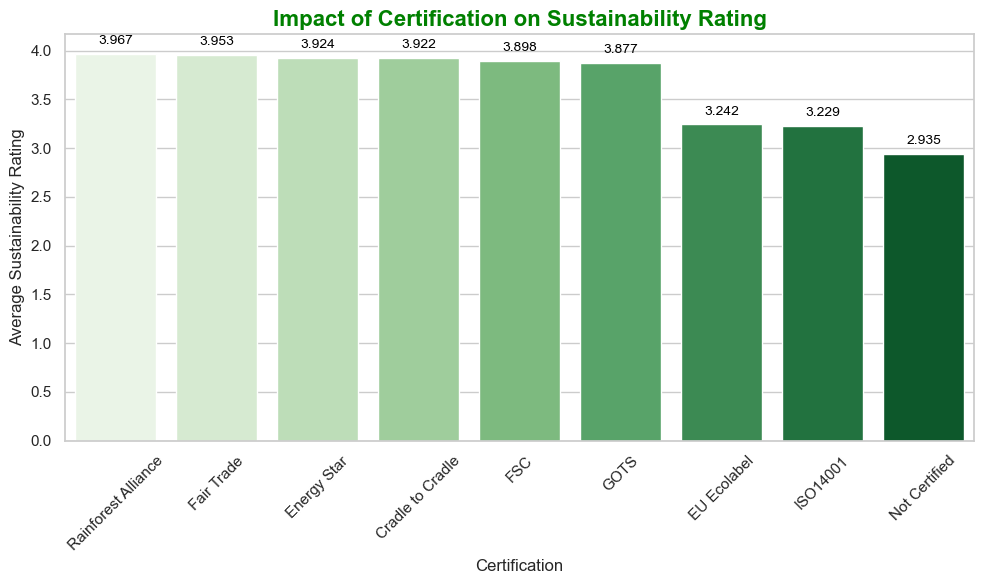

In [122]:
# Impact of Certification on Sustainability Rating

sustainability_fact["certification"] = sustainability_fact["certification_id"].map(
    certification_dim.set_index("certification_id")["certification"]
)

# Calculate average sustainability rating per certification
certification_avg = (
    sustainability_fact.groupby("certification", as_index=False)
    .agg(avg_rating=("sustainability_rating", "mean"))
)

# Round and sort
certification_avg["avg_rating"] = certification_avg["avg_rating"].round(3)
certification_avg = certification_avg.sort_values("avg_rating", ascending=False)


# Visualization using Seaborn & Matplotlib

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot with green shades
green_palette = sns.color_palette("Greens", n_colors=len(certification_avg))
barplot = sns.barplot(
    data=certification_avg,
    x="certification",
    y="avg_rating",
    palette=green_palette
)


# Add labels above bars (correct alignment)

for p in barplot.patches:
    barplot.annotate(
        f"{p.get_height():.3f}",                      # label text
        (p.get_x() + p.get_width() / 2., p.get_height()),  # x,y position
        ha='center', va='bottom',
        fontsize=10, fontweight='medium',
        color='black',
        xytext=(0, 5),  # move 5 pixels above the bar
        textcoords='offset points'
    )


# Labels and title

plt.title("Impact of Certification on Sustainability Rating", fontsize=16, fontweight='bold', color='green')
plt.xlabel("Certification", fontsize=12)
plt.ylabel("Average Sustainability Rating", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


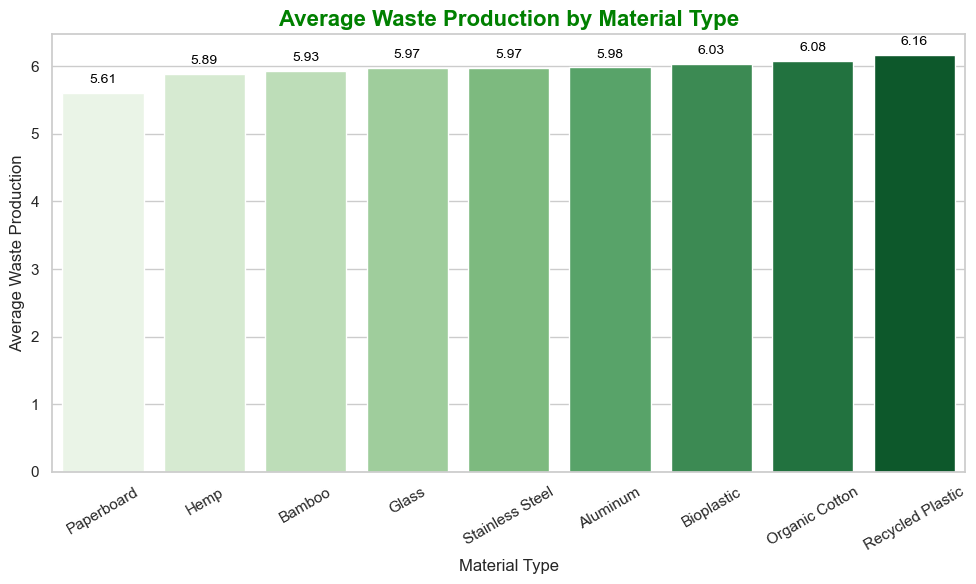

In [123]:
# Average Waste Production by Material Type

sustainability_fact["material_type"] = sustainability_fact["material_id"].map(
    material_dim.set_index("material_id")["material_type"]
)


#  Calculate average waste per material type

material_waste = (
    sustainability_fact.groupby("material_type", as_index=False)
    .agg(avg_waste=("waste_production", "mean"))
)

# Round and sort
material_waste["avg_waste"] = material_waste["avg_waste"].round(2)
material_waste = material_waste.sort_values("avg_waste", ascending=True)


#  Visualization using Seaborn

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Green gradient palette
green_palette = sns.color_palette("Greens", n_colors=len(material_waste))

barplot = sns.barplot(
    data=material_waste,
    x="material_type",
    y="avg_waste",
    palette=green_palette
)


#  Add value labels above bars

for p in barplot.patches:
    barplot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10,
        fontweight='medium',
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

#  Titles and labels

plt.title("Average Waste Production by Material Type", fontsize=16, fontweight='bold', color='green')
plt.xlabel("Material Type", fontsize=12)
plt.ylabel("Average Waste Production", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


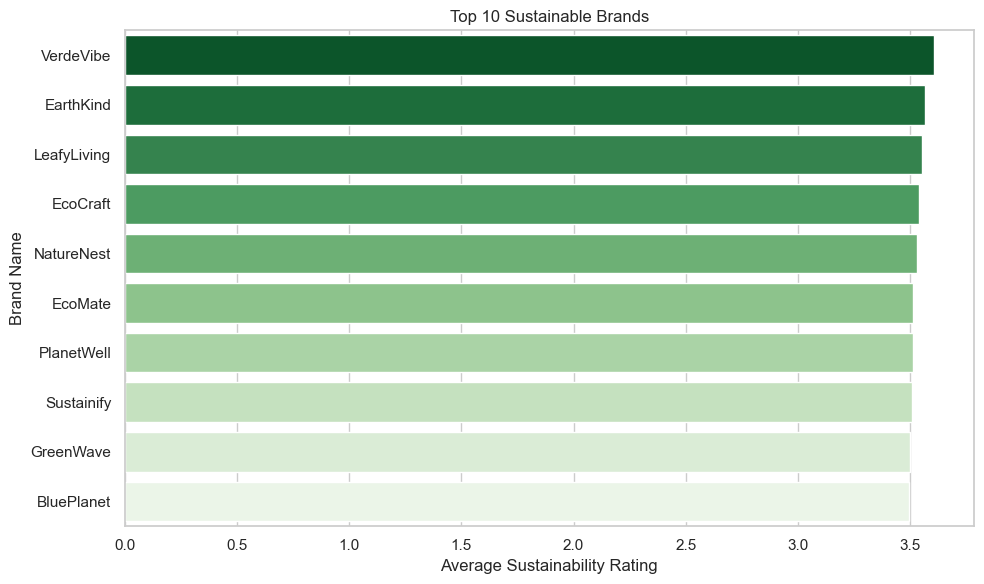

In [124]:
#  Top 10 sustainable brands 
top_brands = df.groupby("brand_name")["sustainability_rating"].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=top_brands.values, y=top_brands.index, palette="Greens_r")
plt.title("Top 10 Sustainable Brands")
plt.xlabel("Average Sustainability Rating")
plt.ylabel("Brand Name")
plt.tight_layout()
plt.show()

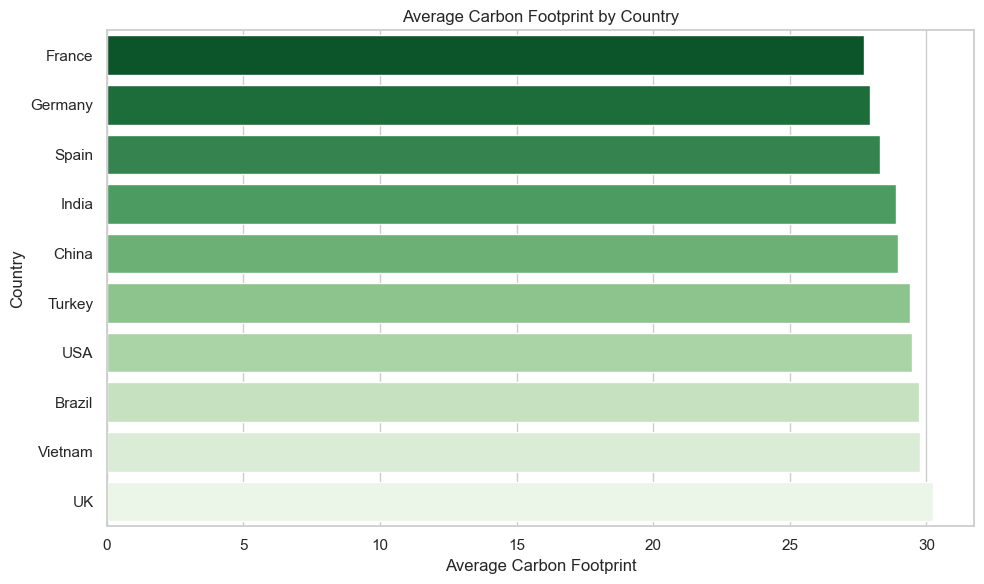

In [125]:
#  Countries with the lowest carbon footprint
carbon_by_country = df.groupby("country_name")["carbon_footprint"].mean().sort_values(ascending=True).head(10)

plt.figure()
sns.barplot(x=carbon_by_country.values, y=carbon_by_country.index, palette="Greens_r")
plt.title("Average Carbon Footprint by Country")
plt.xlabel("Average Carbon Footprint")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

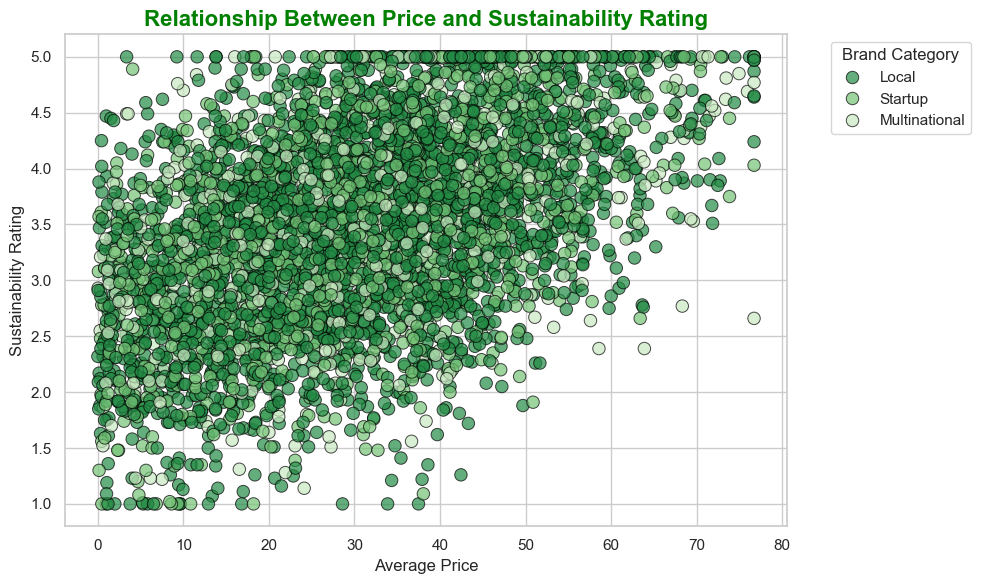

In [126]:
# Relationship Between Price and Sustainability Rating

df = sustainability_fact.copy()
df["brand_category"] = df["brand_id"].map(
    brand_dim.set_index("brand_id")["brand_category"]
)

# Visualization

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="average_price",
    y="sustainability_rating",
    hue="brand_category",
    palette="Greens_r",
    alpha=0.7,
    s=80,  # point size
    edgecolor="black"
)


#  Styling

plt.title("Relationship Between Price and Sustainability Rating", fontsize=16, fontweight="bold", color="green")
plt.xlabel("Average Price", fontsize=12)
plt.ylabel("Sustainability Rating", fontsize=12)

# Move legend outside the plot
plt.legend(title="Brand Category", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


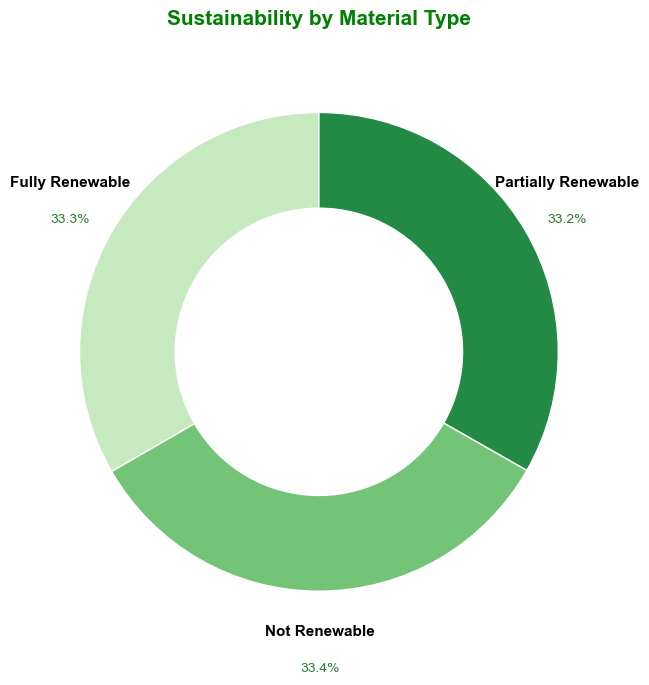

In [127]:

# Renewable vs Non-Renewable Material Comparison 

# Check if the required columns exist
if "material_id" in df.columns and "material_id" in material_dim.columns:

    # Map material_status from material_dim to df
    df["material_status"] = df["material_id"].map(
        material_dim.set_index("material_id")["material_status"]
    )

    # Calculate the average sustainability rating for each material type
    renewable_compare = (
        df.groupby("material_status")["sustainability_rating"]
        .mean()
        .dropna()
        .reset_index()
    )

    # Create custom green shades
    green_shades = sns.color_palette("Greens", n_colors=len(renewable_compare))

    # Create donut chart
    plt.figure(figsize=(7, 7))
    wedges, texts = plt.pie(
        renewable_compare["sustainability_rating"],
        labels=None,
        startangle=90,
        colors=green_shades,
        wedgeprops={"width": 0.4, "edgecolor": "white"}
    )

    # Add labels and percentages (stacked vertically)
    total = renewable_compare["sustainability_rating"].sum()
    for wedge, row in zip(wedges, renewable_compare.itertuples()):
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))

        percent = (row.sustainability_rating / total) * 100

        # Write label (top line)
        plt.text(
            1.2 * x,
            1.25 * y + 0.05,
            row.material_status,
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold",
            color="black"
        )

        # Write percentage (below label)
        plt.text(
            1.2 * x,
            1.25 * y - 0.05,
            f"{percent:.1f}%",
            ha="center",
            va="top",
            fontsize=10,
            color="#2E7D32"
        )

    # Add green title
    plt.title(
        "Sustainability by Material Type",
        color="green",
        fontsize=15,
        fontweight="bold",
        pad=20
    )

    plt.tight_layout()
    plt.show()

else:
    print("The column 'material_id' is missing from df or material_dim.")


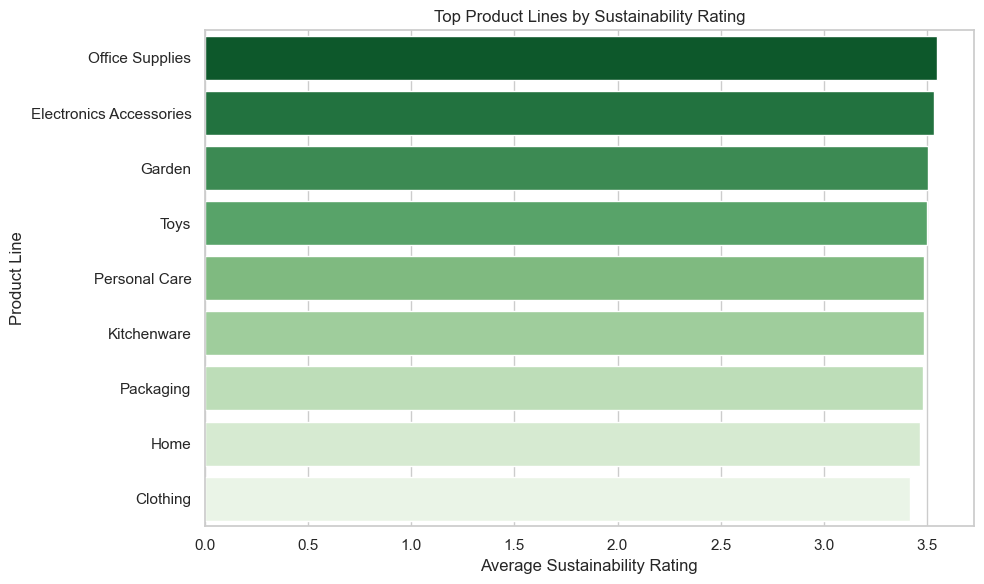

In [128]:
# Top product lines by sustainability rating 
category_avg = df.groupby("product_line")["sustainability_rating"].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=category_avg.values, y=category_avg.index, palette="Greens_r")
plt.title("Top Product Lines by Sustainability Rating")
plt.xlabel("Average Sustainability Rating")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()


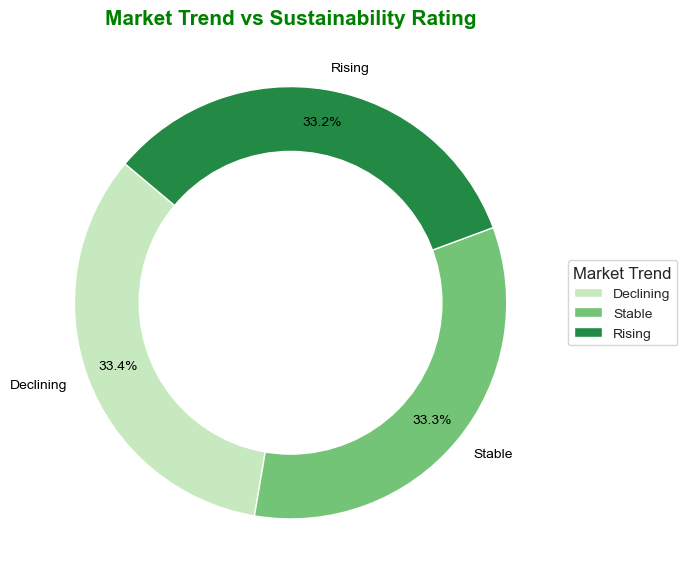

In [129]:
#  Market Trends Impact on Sustainability Rating 

# Check if the required columns exist
if "market_trend_id" in df.columns and "market_trend_id" in market_trend_dim.columns:

    # Add market_trend column from the dimension table using map
    df["market_trend"] = df["market_trend_id"].map(
        market_trend_dim.set_index("market_trend_id")["market_trend"]
    )

    # Calculate average sustainability rating per market trend
    trend_avg = (
        df.groupby("market_trend", as_index=False)["sustainability_rating"]
        .mean()
        .sort_values("sustainability_rating", ascending=False)
    )

    # Define green color palette
    colors = sns.color_palette("Greens", n_colors=len(trend_avg))

    # Create the donut chart
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        trend_avg["sustainability_rating"],
        labels=trend_avg["market_trend"],
        autopct="%1.1f%%",
        startangle=140,
        colors=colors,
        pctdistance=0.85,  # move percentage inside
        textprops={"fontsize": 10, "color": "black"}
    )

    # Draw a white circle in the center to create a donut effect
    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    plt.gca().add_artist(centre_circle)

    # Move legend to the right with values under each label
    plt.legend(
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        title="Market Trend",
        title_fontsize=12,
        fontsize=10
    )

    # Add title
    plt.title("Market Trend vs Sustainability Rating", fontsize=15, color="green", fontweight="bold")

    plt.tight_layout()
    plt.show()

else:
    print("The columns 'market_trend_id' or 'market_trend' are missing from the dataframes.")


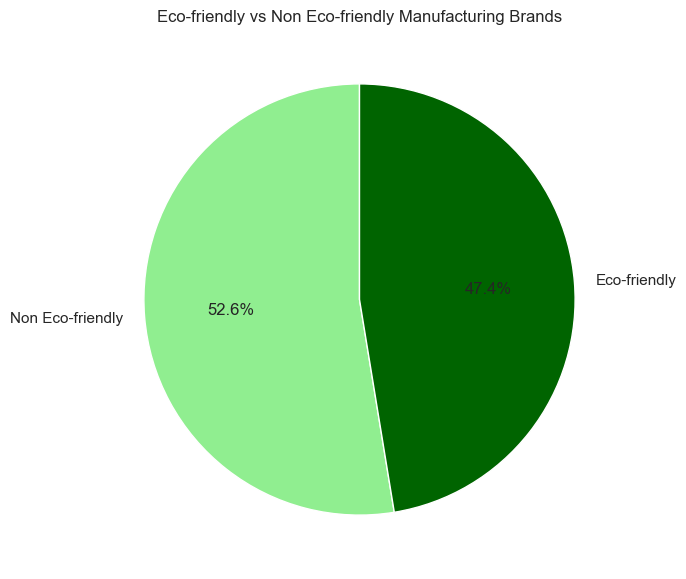

In [130]:
#  Eco-friendly vs Non Eco-friendly Brands 

# Count eco-friendly and non eco-friendly brands
eco_counts = df['eco_friendly_manufacturing'].value_counts()


# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    eco_counts.values,
    labels=['Non Eco-friendly', 'Eco-friendly'],
    autopct='%1.1f%%',
    colors=['lightgreen', 'darkgreen'],  # Light green for non-eco, dark green for eco
    startangle=90
)
plt.title("Eco-friendly vs Non Eco-friendly Manufacturing Brands")
plt.show()

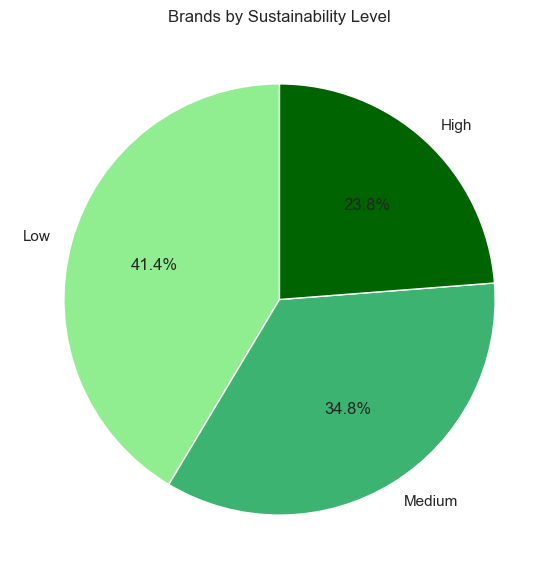

In [131]:
#  Brands by Sustainability Level 

# Count brands by sustainability level
sustain_counts = df['sustainability_level'].value_counts()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    sustain_counts.values,
    labels=sustain_counts.index,  # Not Sustainable / Partially Sustainable / Fully Sustainable
    autopct='%1.1f%%',
    colors=['lightgreen', 'mediumseagreen', 'darkgreen'],  # Light to dark green
    startangle=90
)
plt.title("Brands by Sustainability Level")
plt.show()

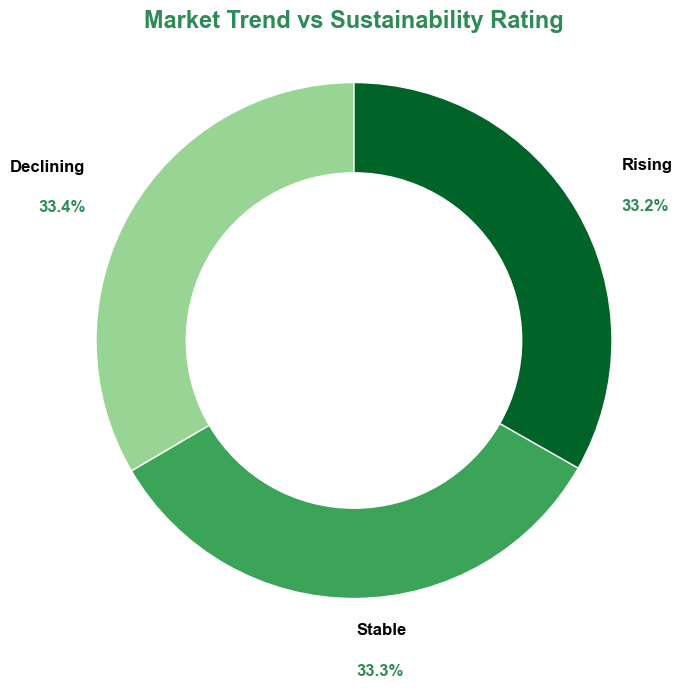

In [132]:
# Market Trend Impact on Sustainability (Improved Donut Chart)

# Map country_id to country_name from country_dim
df["country_name"] = df["country_id"].map(
    country_dim.set_index("country_id")["country_name"]
)

# Calculate average sustainability rating per market trend
trend_avg = (
    df.groupby("market_trend")["sustainability_rating"]
    .mean()
    .dropna()
    .sort_values(ascending=False)
)

# Donut chart setup
plt.figure(figsize=(7, 7))
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(trend_avg)))

wedges, _ = plt.pie(
    trend_avg.values,
    startangle=90,
    colors=colors,
    wedgeprops={"width": 0.35, "edgecolor": "white"},
)

# Title
plt.title(
    "Market Trend vs Sustainability Rating",
    fontsize=17,
    fontweight="bold",
    color="#2E8B57",
    pad=25
)

# Calculate percentages
percentages = (trend_avg / trend_avg.sum() * 100).round(1)

# Add label + percentage neatly with connectors
for i, (wedge, label, pct) in enumerate(zip(wedges, trend_avg.index, percentages)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    # Define outside label position
    x_label = 1.2 * x
    y_label = 1.2 * y

    # Align left or right depending on position
    alignment = "left" if x_label > 0 else "right"

    # Label (bold, above)
    plt.text(
        x_label,
        y_label + 0.05,
        label,
        ha=alignment,
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="black"
    )

    # Percentage (larger, below)
    plt.text(
        x_label,
        y_label - 0.05,
        f"{pct}%",
        ha=alignment,
        va="top",
        fontsize=12,
        fontweight="bold",
        color="#2E8B57"
    )

# Inner white circle (to make donut)
centre_circle = plt.Circle((0, 0), 0.55, color="white", lw=0)
plt.gca().add_artist(centre_circle)

plt.axis("equal")
plt.tight_layout()
plt.show()


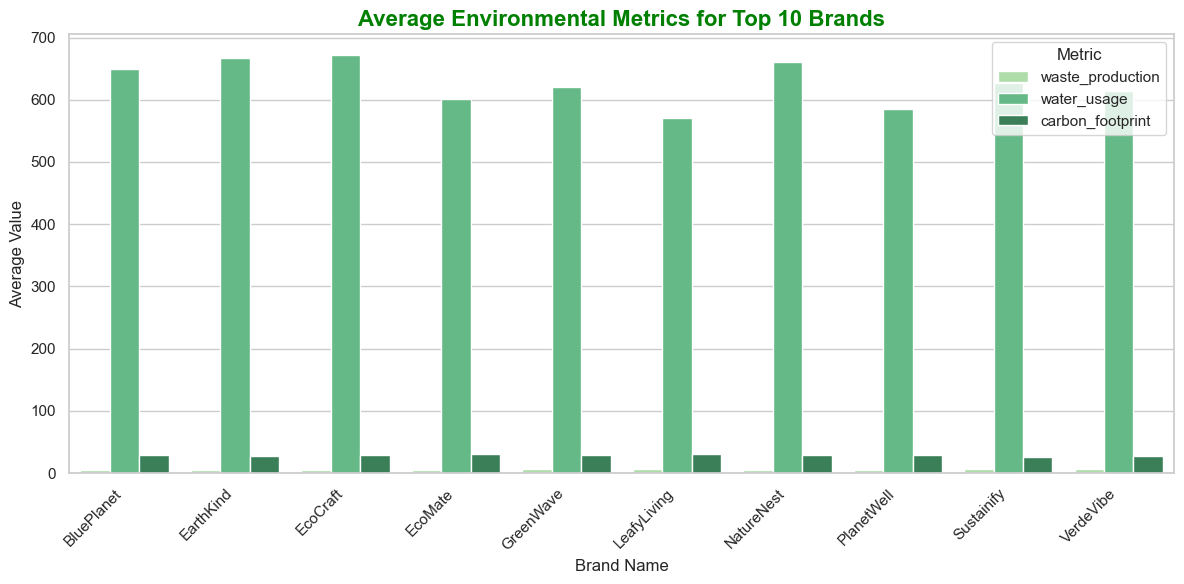

In [133]:
#  Average Environmental Metrics for Top 10 Brands 

# Map brand_name from brand_dim to df
df["brand_name"] = df["brand_id"].map(
    brand_dim.set_index("brand_id")["brand_name"]
)

# Calculate average sustainability rating per brand
brand_avg_rating = (
    df.groupby("brand_name")["sustainability_rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_brands = brand_avg_rating.index.tolist()

# Filter dataset for top 10 brands
df_top = df[df["brand_name"].isin(top_brands)]

# Calculate average metrics for top 10 brands
metrics_avg = (
    df_top.groupby("brand_name")[["waste_production", "water_usage", "carbon_footprint"]]
    .mean()
    .reset_index()
)

# Melt for seaborn plotting
metrics_melted = metrics_avg.melt(
    id_vars="brand_name",
    value_vars=["waste_production", "water_usage", "carbon_footprint"],
    var_name="Metric",
    value_name="Average Value"
)

# Create clustered bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    data=metrics_melted,
    x="brand_name",
    y="Average Value",
    hue="Metric",
    palette=["#A8E6A1", "#57C785", "#2E8B57"]  # different green shades
)

# Title and labels
plt.title(
    "Average Environmental Metrics for Top 10 Brands",
    fontsize=16,
    fontweight="bold",
    color="green"
)
plt.xlabel("Brand Name", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Legend adjustments
plt.legend(title="Metric", loc="upper right", frameon=True)

plt.tight_layout()
plt.show()


In [134]:
# The End of the Project 